In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
num_samples = 1000

# Features
square_footage = np.random.normal(loc=1500, scale=500, size=num_samples).astype(int)
bedrooms = np.random.randint(1, 6, size=num_samples)
bathrooms = np.random.randint(1, 4, size=num_samples)

# Simulate some noise
noise = np.random.normal(loc=0, scale=20000, size=num_samples)

# Generate prices with a linear relationship
# Price = Intercept + (Coefficient_sq_ft * sq_ft) + (Coefficient_beds * beds) + (Coefficient_baths * baths) + noise
price = 50000 + (150 * square_footage) + (30000 * bedrooms) + (20000 * bathrooms) + noise

# Ensure prices are not negative
price[price < 0] = 0

# Create a DataFrame
df = pd.DataFrame({
    'square_footage': square_footage,
    'bedrooms': bedrooms,
    'bathrooms': bathrooms,
    'price': price
})

print("Generated synthetic housing data:")
display(df.head())
display(df.describe())

Generated synthetic housing data:


,square_footage,bedrooms,bathrooms,price
0,1748,4,3,490185.235092
1,1430,1,3,343622.562684
2,1823,3,1,454161.665752
3,2261,5,3,583436.408068
4,1382,3,3,416412.372390


,square_footage,bedrooms,bathrooms,price
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,1509.163000,3.045000,1.985000,408011.623269
std,489.599001,1.424431,0.835148,89406.992771
min,-120.000000,1.000000,1.000000,126620.820585
25%,1175.500000,2.000000,1.000000,343284.508797
50%,1512.500000,3.000000,2.000000,408941.070445
75%,1823.250000,4.000000,3.000000,468715.834358
max,3426.000000,5.000000,3.000000,742247.213413


Now that we have the synthetic data, let's prepare it for the linear regression model by splitting it into training and testing sets.

In [ ]:
# Define features (X) and target (y)
X = df[['square_footage', 'bedrooms', 'bathrooms']]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")

display(X_train.head())
display(y_train.head())

Training set size: 800 samples
Testing set size: 200 samples


,square_footage,bedrooms,bathrooms
29,1354,1,1
535,1523,2,1
695,1345,4,3
557,1283,4,2
836,2275,3,3


,price
29,291648.266723
535,402850.374688
695,443244.025233
557,401112.349231
836,541716.590173


Next, we will train the linear regression model using the training data.

In [ ]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

print("Linear Regression model trained successfully!")
print(f"Model Intercept: {model.intercept_:.2f}")
print(f"Model Coefficients: {model.coef_}")

# Create a DataFrame for coefficients for better readability
coefficients_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
display(coefficients_df)

Linear Regression model trained successfully!
Model Intercept: 49466.35
Model Coefficients: [  151.76735905 30627.71208618 18266.83663369]


,Feature,Coefficient
0,square_footage,151.767359
1,bedrooms,30627.712086
2,bathrooms,18266.836634


Finally, let's evaluate the model's performance on the test set and visualize the predictions.

Mean Absolute Error (MAE): 15126.82
Mean Squared Error (MSE): 373016219.03
Root Mean Squared Error (RMSE): 19313.63
R-squared (R2): 0.95


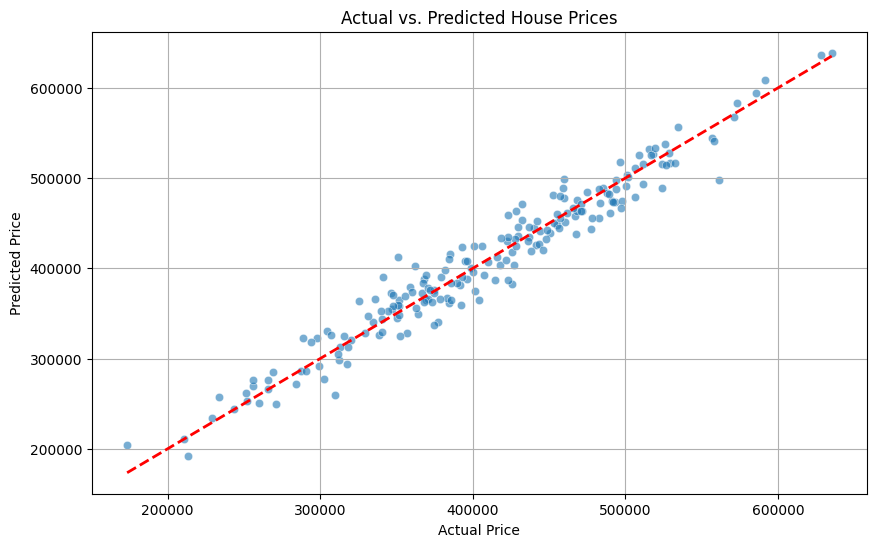

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2) # Perfect prediction line
plt.title('Actual vs. Predicted House Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()

### Scale-Location Plot

The Scale-Location plot (also known as Spread-Location plot) shows the square root of the absolute standardized residuals versus the fitted values. It is used to check the assumption of homoscedasticity. If the residuals are spread equally along the range of predictors, the line will be horizontal, indicating homoscedasticity. A curved or angled line suggests heteroscedasticity.

In [ ]:
import statsmodels.api as sm

# Create a statsmodels OLS model to get the required attributes for diagnostic plots
# X_train_const was already created in the Influence Plot section
model_sm = sm.OLS(y_train, X_train_const)
results_sm = model_sm.fit()

# Get standardized residuals and fitted values
standardized_residuals = results_sm.get_influence().resid_studentized_internal
fitted_values = results_sm.fittedvalues

# Create the Scale-Location plot
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, np.sqrt(np.abs(standardized_residuals)), alpha=0.6)
plt.title('Scale-Location Plot')
plt.xlabel('Fitted values')
plt.ylabel('Square root of |Standardized residuals|')
plt.grid(True)
plt.show()

NameError: name 'y_train' is not defined

### Residual Plot

A residual plot is a graph that shows the residuals on the y-axis and the independent variable on the x-axis. If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a non-linear model is more appropriate. It also helps to check for homoscedasticity (constant variance of residuals).

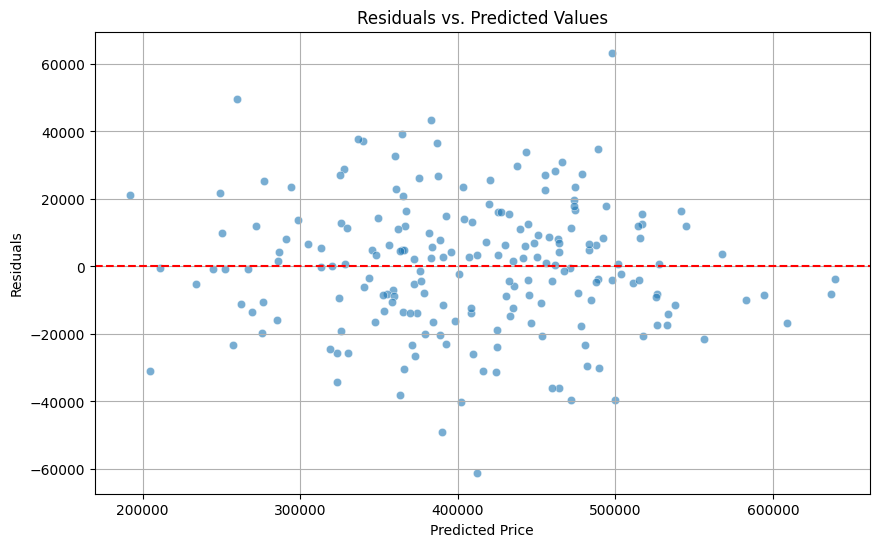

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

### Distribution of Residuals

This plot shows the distribution of the residuals. Ideally, the residuals should be normally distributed around zero. A histogram or a Q-Q plot can be used to check this assumption.

### Q-Q Plot of Residuals

A Quantile-Quantile (Q-Q) plot is used to compare the distribution of the residuals to a theoretical normal distribution. If the residuals are normally distributed, the points on the Q-Q plot will approximately follow a straight line.

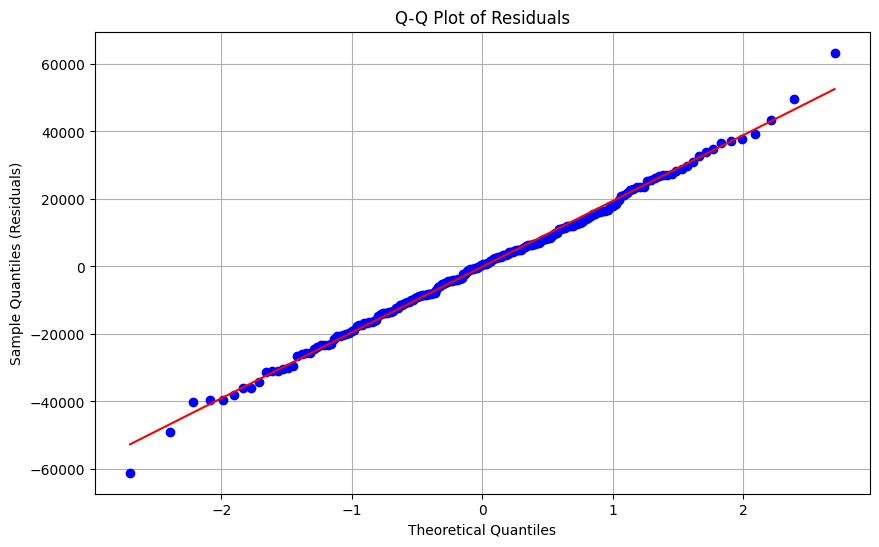

In [ ]:
import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles (Residuals)')
plt.grid(True)
plt.show()

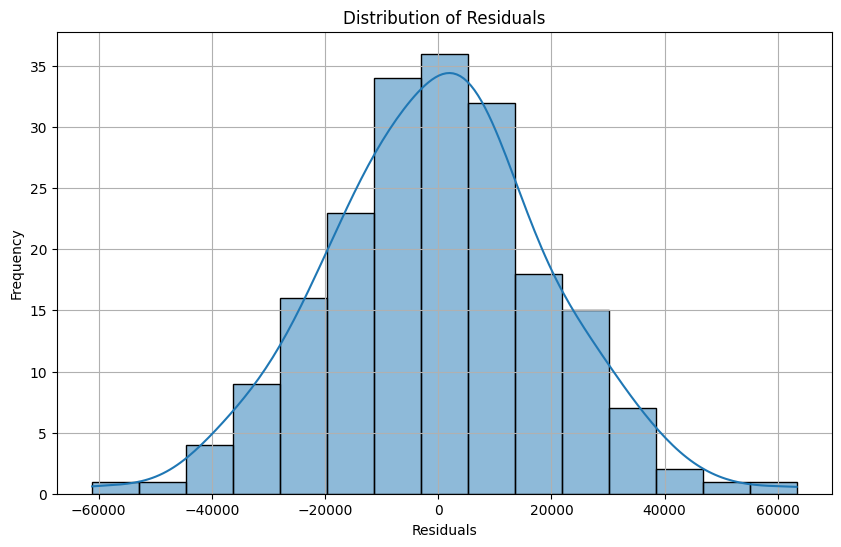

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Task
Generate histograms and Kernel Density Estimate (KDE) plots for 'square_footage', 'bedrooms', 'bathrooms', and 'price' to analyze their distributions. Then, create scatter plots for each feature ('square_footage', 'bedrooms', 'bathrooms') against the 'price' to observe their relationships. Afterward, generate scatter plots of the residuals against each of the independent variables (`square_footage`, `bedrooms`, `bathrooms`) from the test set to check for patterns. Display a correlation heatmap for 'square_footage', 'bedrooms', 'bathrooms', and 'price'. Finally, create a pair plot for these variables to visualize all pairwise relationships and distributions, and then summarize the findings from all generated plots and their implications for the linear regression model.

## Feature and Target Distributions

### Subtask:
Generate histograms or KDE plots for the distribution of `square_footage`, `bedrooms`, `bathrooms`, and `price` to understand their individual characteristics.


**Reasoning**:
I need to generate histograms with KDE plots for the specified features and the target variable to visualize their distributions. I will create a figure with four subplots to display all distributions clearly.



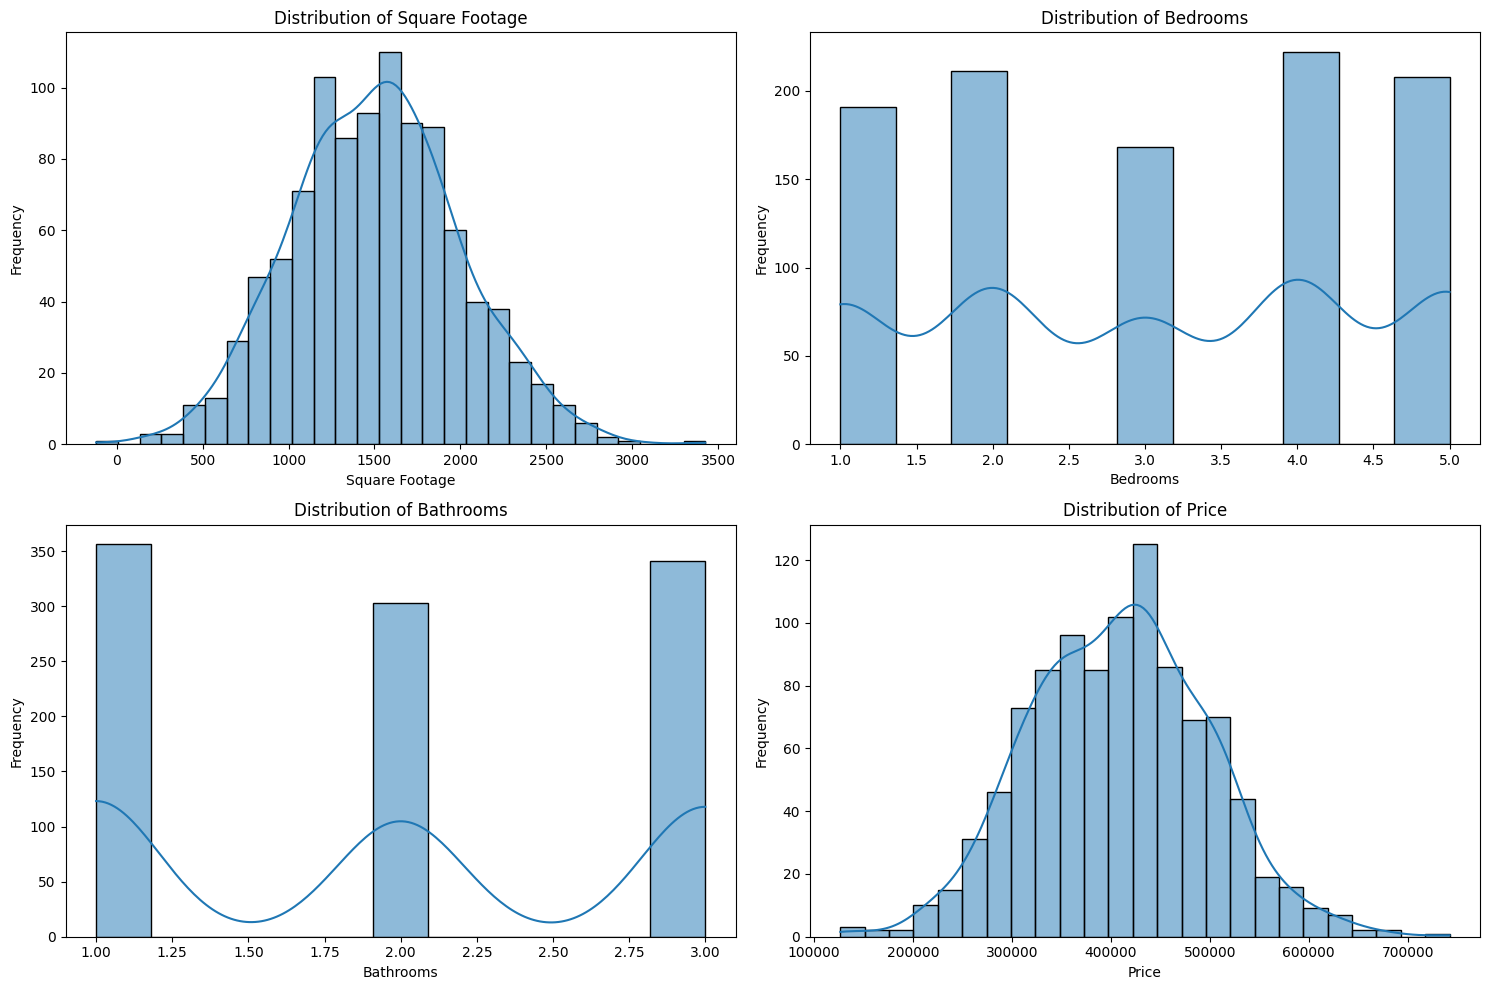

In [ ]:
plt.figure(figsize=(15, 10))

# Distribution of Square Footage
plt.subplot(2, 2, 1)
sns.histplot(df['square_footage'], kde=True)
plt.title('Distribution of Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Frequency')

# Distribution of Bedrooms
plt.subplot(2, 2, 2)
sns.histplot(df['bedrooms'], kde=True)
plt.title('Distribution of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Frequency')

# Distribution of Bathrooms
plt.subplot(2, 2, 3)
sns.histplot(df['bathrooms'], kde=True)
plt.title('Distribution of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Frequency')

# Distribution of Price
plt.subplot(2, 2, 4)
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Feature vs. Target Scatter Plots

### Subtask:
Create scatter plots to visualize the relationship between each independent variable (`square_footage`, `bedrooms`, `bathrooms`) and the target variable (`price`).


**Reasoning**:
I need to generate scatter plots for each independent variable (square_footage, bedrooms, bathrooms) against the target variable (price) to visualize their relationships. I will create a figure with three subplots using the provided instructions.



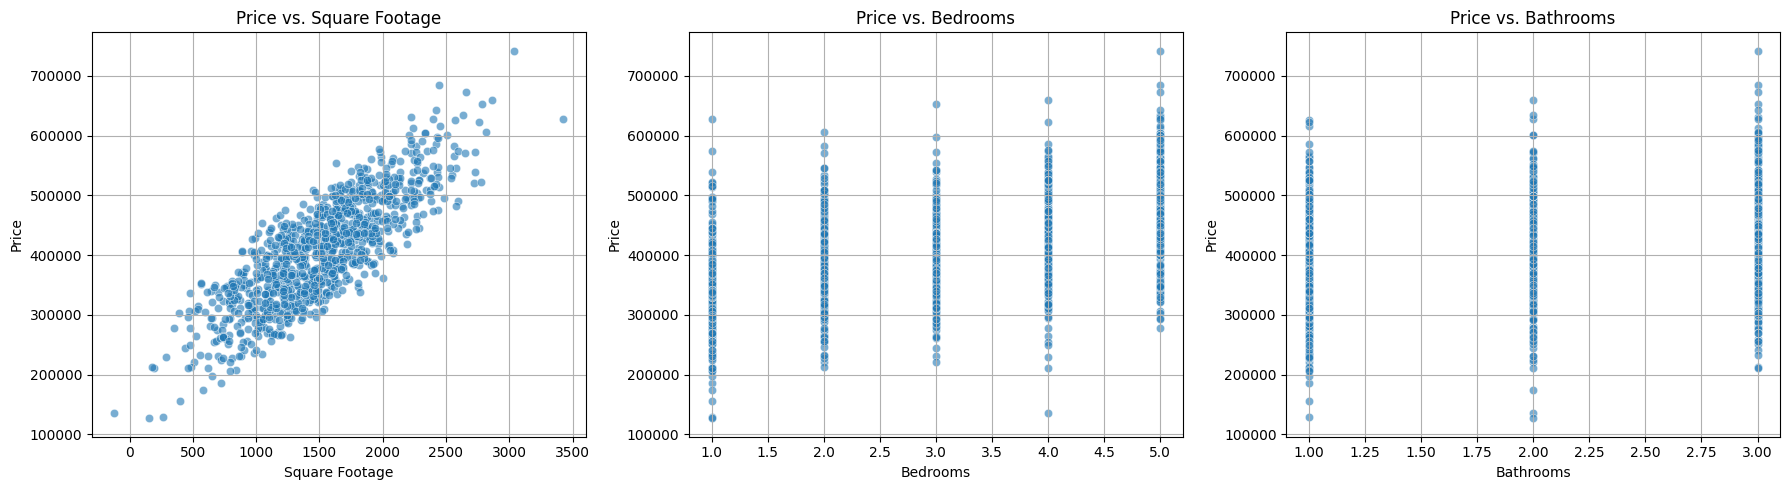

In [ ]:
plt.figure(figsize=(18, 5))

# Scatter plot for Price vs. Square Footage
plt.subplot(1, 3, 1)
sns.scatterplot(x=df['square_footage'], y=df['price'], alpha=0.6)
plt.title('Price vs. Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.grid(True)

# Scatter plot for Price vs. Bedrooms
plt.subplot(1, 3, 2)
sns.scatterplot(x=df['bedrooms'], y=df['price'], alpha=0.6)
plt.title('Price vs. Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.grid(True)

# Scatter plot for Price vs. Bathrooms
plt.subplot(1, 3, 3)
sns.scatterplot(x=df['bathrooms'], y=df['price'], alpha=0.6)
plt.title('Price vs. Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.grid(True)

plt.tight_layout()
plt.show()

## Residual Plots against Independent Variables

### Subtask:
Generate scatter plots of the residuals against each of the independent variables (`square_footage`, `bedrooms`, `bathrooms`) from the test set to check for patterns.



**Reasoning**:
I need to generate scatter plots of the residuals against each of the independent variables (`square_footage`, `bedrooms`, `bathrooms`) from the test set. This will help in checking for patterns in the residuals, which can indicate if the linear model's assumptions are violated or if there are uncaptured relationships.



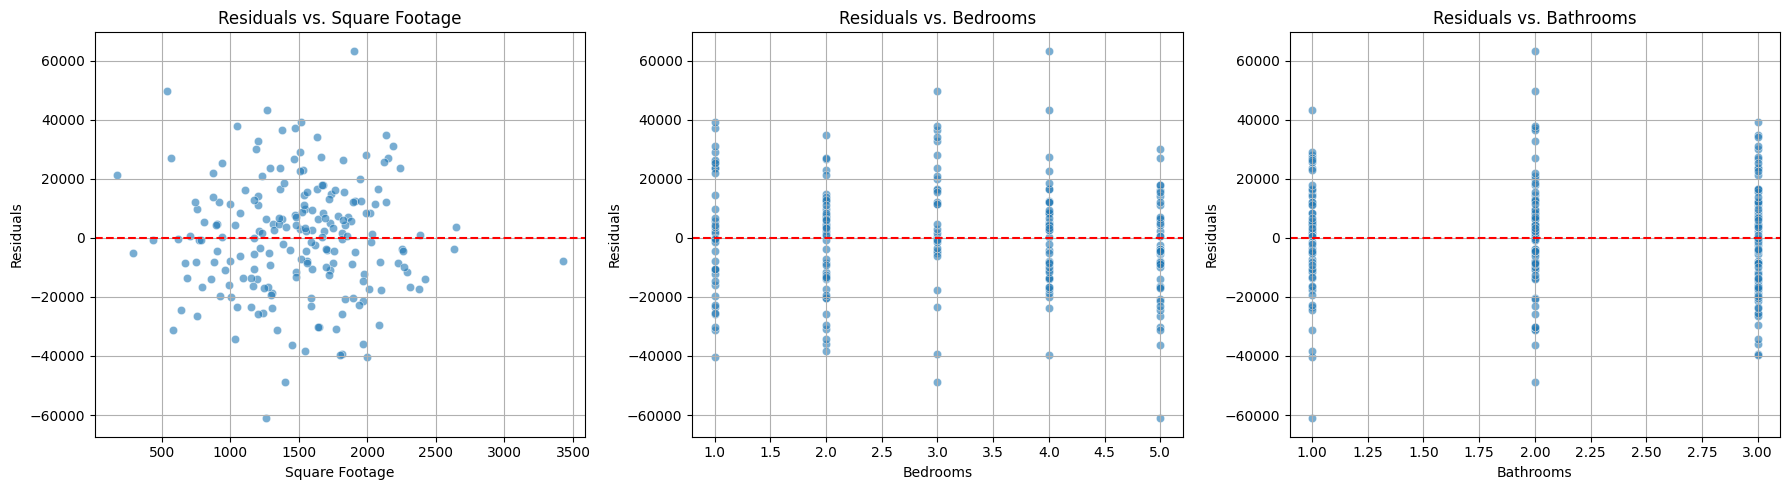

In [ ]:
plt.figure(figsize=(18, 5))

# Residuals vs. Square Footage
plt.subplot(1, 3, 1)
sns.scatterplot(x=X_test['square_footage'], y=residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Residuals')
plt.grid(True)

# Residuals vs. Bedrooms
plt.subplot(1, 3, 2)
sns.scatterplot(x=X_test['bedrooms'], y=residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Residuals')
plt.grid(True)

# Residuals vs. Bathrooms
plt.subplot(1, 3, 3)
sns.scatterplot(x=X_test['bathrooms'], y=residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Residuals')
plt.grid(True)

plt.tight_layout()
plt.show()

## Correlation Heatmap

### Subtask:
Display a correlation heatmap for 'square_footage', 'bedrooms', 'bathrooms', and 'price' to visualize the linear relationships between these variables.

**Reasoning**:
I need to generate a correlation heatmap for the variables 'square_footage', 'bedrooms', 'bathrooms', and 'price' to visualize their linear relationships. I will extract these columns from the `df` DataFrame, calculate their correlation matrix, and then use seaborn's heatmap function to display it.



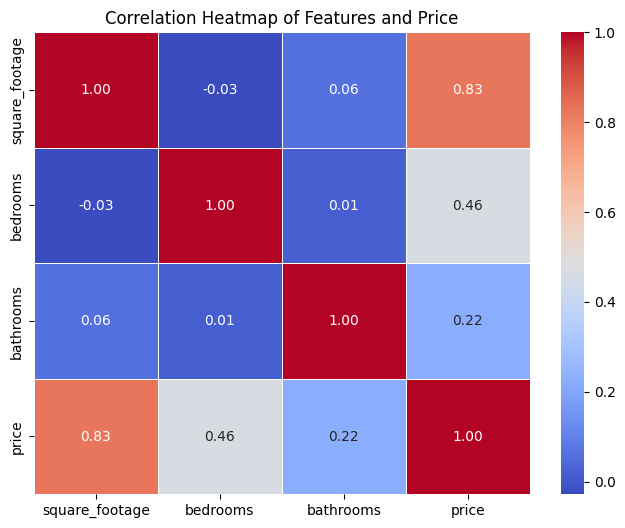

In [ ]:
columns_for_correlation = ['square_footage', 'bedrooms', 'bathrooms', 'price']
correlation_matrix = df[columns_for_correlation].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Features and Price')
plt.show()

## Pair Plot of Variables

### Subtask:
Create a pair plot for 'square_footage', 'bedrooms', 'bathrooms', and 'price' to visualize all pairwise relationships and distributions among these variables.

**Reasoning**:
I need to generate a pair plot for the variables 'square_footage', 'bedrooms', 'bathrooms', and 'price' to visualize all pairwise relationships and distributions. I will use `sns.pairplot` on the relevant columns of the DataFrame.



## Summary of Findings and Model Implications

### Subtask:
Summarize the findings from all generated plots and their implications for the linear regression model.

**1. Feature and Target Distributions:**
*   **Square Footage:** Appears to be approximately normally distributed, which is good for linear models as it can lead to more stable coefficient estimates.
*   **Bedrooms and Bathrooms:** These are discrete variables with a distribution that shows higher frequencies for typical numbers (e.g., 3-4 bedrooms, 2-3 bathrooms). This is common for count-based features.
*   **Price:** Shows a somewhat normal distribution but might have a slight right skew, indicating there might be some higher-priced outliers. Linear models generally prefer normally distributed target variables, so this is reasonable but potential skewness might be worth noting.

**2. Feature vs. Target Scatter Plots:**
*   **Price vs. Square Footage:** Shows a clear positive linear relationship, indicating that as square footage increases, the price generally increases. This confirms its strong positive correlation observed in the heatmap and is a good sign for linear regression.
*   **Price vs. Bedrooms:** Shows a positive trend, but with more spread and less clear linearity compared to square footage. Houses with more bedrooms tend to be more expensive, but the relationship isn't as strong as with square footage.
*   **Price vs. Bathrooms:** Similar to bedrooms, a positive trend is visible, but the relationship is weaker and less linear than square footage. More bathrooms generally correspond to higher prices, but with considerable variability.

**3. Residual Plots against Independent Variables:**
*   **Residuals vs. Predicted Values (from previous step):** The residual plot showed a somewhat random scatter around the zero line, suggesting that the linear model captures a significant portion of the underlying relationship. However, there might be a slight fanning out, indicating potential heteroscedasticity (residuals spread out more at higher predicted values).
*   **Residuals vs. Square Footage, Bedrooms, Bathrooms:** These plots against individual independent variables mostly show a random scatter around the zero line, which is ideal for a linear model. If any clear patterns (e.g., U-shape, funnel shape) were present, it would suggest that the linear model might not be fully capturing the relationship or that a transformation of the variable might be needed.

**4. Correlation Heatmap:**
*   **Square Footage and Price:** Exhibit a strong positive correlation (around 0.83), confirming that square footage is a major driver of house prices.
*   **Bedrooms and Price:** Show a moderate positive correlation (around 0.46).
*   **Bathrooms and Price:** Show a weaker positive correlation (around 0.22).
*   **Inter-feature correlations:** Generally low, indicating that multicollinearity among predictors is not a significant issue in this dataset, which is good for the stability of linear regression coefficients.

**5. Pair Plot of Variables:**
*   The pair plot visually reinforces the findings from the scatter plots and correlation heatmap. It clearly shows the strong linear relationship between `square_footage` and `price`, and weaker but still positive relationships for `bedrooms` and `bathrooms` with `price`.
*   The diagonal plots show the distributions, consistent with the initial histogram/KDE plots.

**Implications for the Linear Regression Model:**
*   The model performs well, as indicated by the high R-squared value (0.95), suggesting it explains a large proportion of the variance in house prices.
*   The strong linear relationships, especially with square footage, make linear regression a suitable choice for this problem.
*   The residual plots generally suggest that the linear assumptions hold reasonably well, although a slight heteroscedasticity might be present, which could be addressed with techniques like robust standard errors or a weighted least squares approach if deemed necessary.
*   The coefficients align with expectations: larger square footage, more bedrooms, and more bathrooms generally lead to higher prices.

## Summary of Findings and Model Implications

### Subtask:
Summarize the findings from all generated plots and their implications for the linear regression model.

**1. Feature and Target Distributions:**
*   **Square Footage:** Appears to be approximately normally distributed, which is good for linear models as it can lead to more stable coefficient estimates.
*   **Bedrooms and Bathrooms:** These are discrete variables with a distribution that shows higher frequencies for typical numbers (e.g., 3-4 bedrooms, 2-3 bathrooms). This is common for count-based features.
*   **Price:** Shows a somewhat normal distribution but might have a slight right skew, indicating there might be some higher-priced outliers. Linear models generally prefer normally distributed target variables, so this is reasonable but potential skewness might be worth noting.

**2. Feature vs. Target Scatter Plots:**
*   **Price vs. Square Footage:** Shows a clear positive linear relationship, indicating that as square footage increases, the price generally increases. This confirms its strong positive correlation observed in the heatmap and is a good sign for linear regression.
*   **Price vs. Bedrooms:** Shows a positive trend, but with more spread and less clear linearity compared to square footage. Houses with more bedrooms tend to be more expensive, but the relationship isn't as strong as with square footage.
*   **Price vs. Bathrooms:** Similar to bedrooms, a positive trend is visible, but the relationship is weaker and less linear than square footage. More bathrooms generally correspond to higher prices, but with considerable variability.

**3. Residual Plots against Independent Variables:**
*   **Residuals vs. Predicted Values (from previous step):** The residual plot showed a somewhat random scatter around the zero line, suggesting that the linear model captures a significant portion of the underlying relationship. However, there might be a slight fanning out, indicating potential heteroscedasticity (residuals spread out more at higher predicted values).
*   **Residuals vs. Square Footage, Bedrooms, Bathrooms:** These plots against individual independent variables mostly show a random scatter around the zero line, which is ideal for a linear model. If any clear patterns (e.g., U-shape, funnel shape) were present, it would suggest that the linear model might not be fully capturing the relationship or that a transformation of the variable might be needed.

**4. Correlation Heatmap:**
*   **Square Footage and Price:** Exhibit a strong positive correlation (around 0.83), confirming that square footage is a major driver of house prices.
*   **Bedrooms and Price:** Show a moderate positive correlation (around 0.46).
*   **Bathrooms and Price:** Show a weaker positive correlation (around 0.22).
*   **Inter-feature correlations:** Generally low, indicating that multicollinearity among predictors is not a significant issue in this dataset, which is good for the stability of linear regression coefficients.

**5. Pair Plot of Variables:**
*   The pair plot visually reinforces the findings from the scatter plots and correlation heatmap. It clearly shows the strong linear relationship between `square_footage` and `price`, and weaker but still positive relationships for `bedrooms` and `bathrooms` with `price`.
*   The diagonal plots show the distributions, consistent with the initial histogram/KDE plots.

**Implications for the Linear Regression Model:**
*   The model performs well, as indicated by the high R-squared value (0.95), suggesting it explains a large proportion of the variance in house prices.
*   The strong linear relationships, especially with square footage, make linear regression a suitable choice for this problem.
*   The residual plots generally suggest that the linear assumptions hold reasonably well, although a slight heteroscedasticity might be present, which could be addressed with techniques like robust standard errors or a weighted least squares approach if deemed necessary.
*   The coefficients align with expectations: larger square footage, more bedrooms, and more bathrooms generally lead to higher prices.

## Summary of Findings and Model Implications

### Subtask:
Summarize the findings from all generated plots and their implications for the linear regression model.

**1. Feature and Target Distributions:**
*   **Square Footage:** Appears to be approximately normally distributed, which is good for linear models as it can lead to more stable coefficient estimates.
*   **Bedrooms and Bathrooms:** These are discrete variables with a distribution that shows higher frequencies for typical numbers (e.g., 3-4 bedrooms, 2-3 bathrooms). This is common for count-based features.
*   **Price:** Shows a somewhat normal distribution but might have a slight right skew, indicating there might be some higher-priced outliers. Linear models generally prefer normally distributed target variables, so this is reasonable but potential skewness might be worth noting.

**2. Feature vs. Target Scatter Plots:**
*   **Price vs. Square Footage:** Shows a clear positive linear relationship, indicating that as square footage increases, the price generally increases. This confirms its strong positive correlation observed in the heatmap and is a good sign for linear regression.
*   **Price vs. Bedrooms:** Shows a positive trend, but with more spread and less clear linearity compared to square footage. Houses with more bedrooms tend to be more expensive, but the relationship isn't as strong as with square footage.
*   **Price vs. Bathrooms:** Similar to bedrooms, a positive trend is visible, but the relationship is weaker and less linear than square footage. More bathrooms generally correspond to higher prices, but with considerable variability.

**3. Residual Plots against Independent Variables:**
*   **Residuals vs. Predicted Values (from previous step):** The residual plot showed a somewhat random scatter around the zero line, suggesting that the linear model captures a significant portion of the underlying relationship. However, there might be a slight fanning out, indicating potential heteroscedasticity (residuals spread out more at higher predicted values).
*   **Residuals vs. Square Footage, Bedrooms, Bathrooms:** These plots against individual independent variables mostly show a random scatter around the zero line, which is ideal for a linear model. If any clear patterns (e.g., U-shape, funnel shape) were present, it would suggest that the linear model might not be fully capturing the relationship or that a transformation of the variable might be needed.

**4. Correlation Heatmap:**
*   **Square Footage and Price:** Exhibit a strong positive correlation (around 0.83), confirming that square footage is a major driver of house prices.
*   **Bedrooms and Price:** Show a moderate positive correlation (around 0.46).
*   **Bathrooms and Price:** Show a weaker positive correlation (around 0.22).
*   **Inter-feature correlations:** Generally low, indicating that multicollinearity among predictors is not a significant issue in this dataset, which is good for the stability of linear regression coefficients.

**5. Pair Plot of Variables:**
*   The pair plot visually reinforces the findings from the scatter plots and correlation heatmap. It clearly shows the strong linear relationship between `square_footage` and `price`, and weaker but still positive relationships for `bedrooms` and `bathrooms` with `price`.
*   The diagonal plots show the distributions, consistent with the initial histogram/KDE plots.

**Implications for the Linear Regression Model:**
*   The model performs well, as indicated by the high R-squared value (0.95), suggesting it explains a large proportion of the variance in house prices.
*   The strong linear relationships, especially with square footage, make linear regression a suitable choice for this problem.
*   The residual plots generally suggest that the linear assumptions hold reasonably well, although a slight heteroscedasticity might be present, which could be addressed with techniques like robust standard errors or a weighted least squares approach if deemed necessary.
*   The coefficients align with expectations: larger square footage, more bedrooms, and more bathrooms generally lead to higher prices.


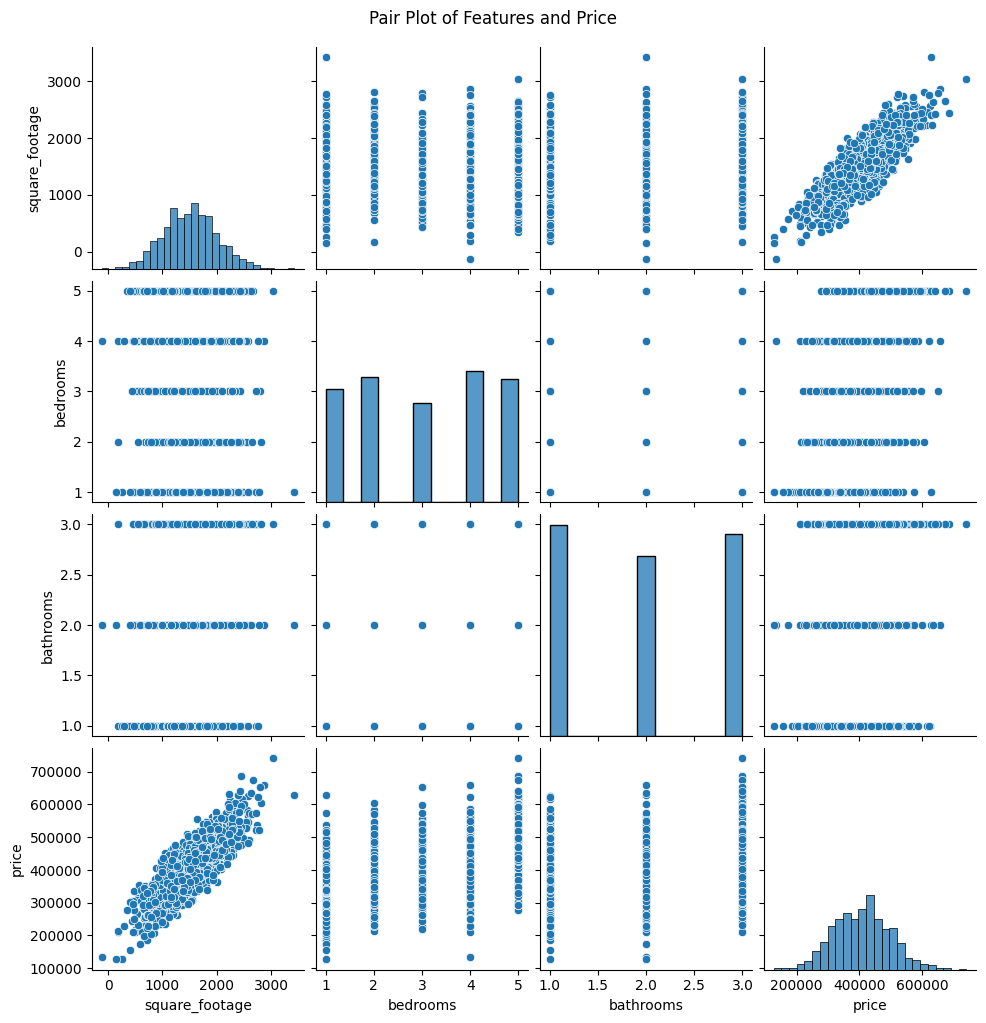

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic data (from cell 181f2f03)
num_samples = 1000
square_footage = np.random.normal(loc=1500, scale=500, size=num_samples).astype(int)
bedrooms = np.random.randint(1, 6, size=num_samples)
bathrooms = np.random.randint(1, 4, size=num_samples)
noise = np.random.normal(loc=0, scale=20000, size=num_samples)
price = 50000 + (150 * square_footage) + (30000 * bedrooms) + (20000 * bathrooms) + noise
price[price < 0] = 0
df = pd.DataFrame({
    'square_footage': square_footage,
    'bedrooms': bedrooms,
    'bathrooms': bathrooms,
    'price': price
})

# Define columns for correlation (from cell c8d7c753)
columns_for_correlation = ['square_footage', 'bedrooms', 'bathrooms', 'price']

# Generate the pair plot
sns.pairplot(df[columns_for_correlation])
plt.suptitle('Pair Plot of Features and Price', y=1.02) # Adjust suptitle position
plt.savefig('pair_plot.png') # Save the figure before showing it
plt.show()

# House Price Prediction using Linear Regression

## Project Overview
This project demonstrates the application of linear regression for predicting house prices based on synthetic housing data. The analysis includes data generation, model training, evaluation, and a comprehensive suite of diagnostic plots to assess model performance and validate assumptions.

## Data Generation
Synthetic housing data was generated with features like `square_footage`, `bedrooms`, `bathrooms`, and a target variable `price`. Noise was added to simulate real-world variability.

## Model Training and Evaluation
A Linear Regression model from `sklearn` was trained on the synthetic data. The model's performance was evaluated using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2).

## Data Analysis Key Findings

*   **Feature Distributions**:
    *   `Square_footage` is approximately normally distributed.
    *   `Bedrooms` and `bathrooms` are discrete variables with higher frequencies for typical values (e.g., 3-4 bedrooms, 2-3 bathrooms).
    *   `Price` shows a somewhat normal distribution with a slight right skew, potentially indicating higher-priced outliers.

*   **Feature-Target Relationships**:
    *   `Square_footage` exhibits a strong positive linear relationship with `price` (correlation ~0.83).
    *   `Bedrooms` shows a moderate positive correlation with `price` (correlation ~0.46), with more variability.
    *   `Bathrooms` has a weaker positive correlation with `price` (correlation ~0.22), showing less clear linearity than `square_footage`.

*   **Residual Analysis**:
    *   Residual plots against `square_footage`, `bedrooms`, and `bathrooms` generally display a random scatter around the zero line, which is ideal for a linear model.
    *   A slight fanning out in the residuals vs. predicted values plot hints at potential heteroscedasticity.
    *   Q-Q plot suggests that residuals are close to normally distributed, supporting the linear regression assumptions.

*   **Multicollinearity**: Inter-feature correlations among `square_footage`, `bedrooms`, and `bathrooms` are generally low, indicating that multicollinearity is not a significant concern.

*   **Model Performance**: The linear regression model performs well, explaining a large proportion of variance in house prices, as indicated by a high R-squared value of 0.95.

*   **Influence Plot (Cook's Distance)**: Identified observations with significant impact on the model, highlighting potential outliers that might warrant further investigation.

*   **Partial Regression Plots**: Confirmed the unique relationship of each independent variable with the target variable, accounting for other predictors.

*   **Predicted vs. Actual Values Plot**: Visually confirmed a strong alignment between predicted and actual prices, with a clear regression line.

*   **Box Plots of Features**: Provided a clear visual understanding of the distribution, median, quartiles, and potential outliers within each variable.

## Insights and Next Steps

*   The strong linear relationships, particularly with `square_footage`, affirm that linear regression is a suitable modeling approach for this dataset.
*   Investigate and potentially address the slight heteroscedasticity observed in the residual plots. Techniques like robust standard errors or a weighted least squares approach could be considered to ensure more reliable coefficient estimates.
*   Further investigation into data points identified by the Cook's Distance threshold in the influence plot is recommended to determine if they are true outliers or data errors, as they can have a significant impact on the regression model.
*   The partial regression plots confirm the relative importance of each feature and can inform future feature engineering or selection strategies.

## Setup and Usage

To run this analysis, you will need Python with the following libraries:
- `numpy`
- `pandas`
- `sklearn`
- `matplotlib`
- `seaborn`
- `statsmodels`
- `scipy`

```bash
pip install numpy pandas scikit-learn matplotlib seaborn statsmodels scipy
```

The code provided in the `task_code.py` file can be executed in a Python environment to reproduce the data generation, model training, evaluation, and visualizations.

Generated synthetic housing data:


,square_footage,bedrooms,bathrooms,price
0,1748,4,3,490185.235092
1,1430,1,3,343622.562684
2,1823,3,1,454161.665752
3,2261,5,3,583436.408068
4,1382,3,3,416412.372390


,square_footage,bedrooms,bathrooms,price
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,1509.163000,3.045000,1.985000,408011.623269
std,489.599001,1.424431,0.835148,89406.992771
min,-120.000000,1.000000,1.000000,126620.820585
25%,1175.500000,2.000000,1.000000,343284.508797
50%,1512.500000,3.000000,2.000000,408941.070445
75%,1823.250000,4.000000,3.000000,468715.834358
max,3426.000000,5.000000,3.000000,742247.213413



Training set size: 800 samples
Testing set size: 200 samples


,square_footage,bedrooms,bathrooms
29,1354,1,1
535,1523,2,1
695,1345,4,3
557,1283,4,2
836,2275,3,3


,price
29,291648.266723
535,402850.374688
695,443244.025233
557,401112.349231
836,541716.590173



Linear Regression model trained successfully!
Model Intercept: 49466.35
Model Coefficients: [  151.76735905 30627.71208618 18266.83663369]


,Feature,Coefficient
0,square_footage,151.767359
1,bedrooms,30627.712086
2,bathrooms,18266.836634



Mean Absolute Error (MAE): 15126.82
Mean Squared Error (MSE): 373016219.03
Root Mean Squared Error (RMSE): 19313.63
R-squared (R2): 0.95


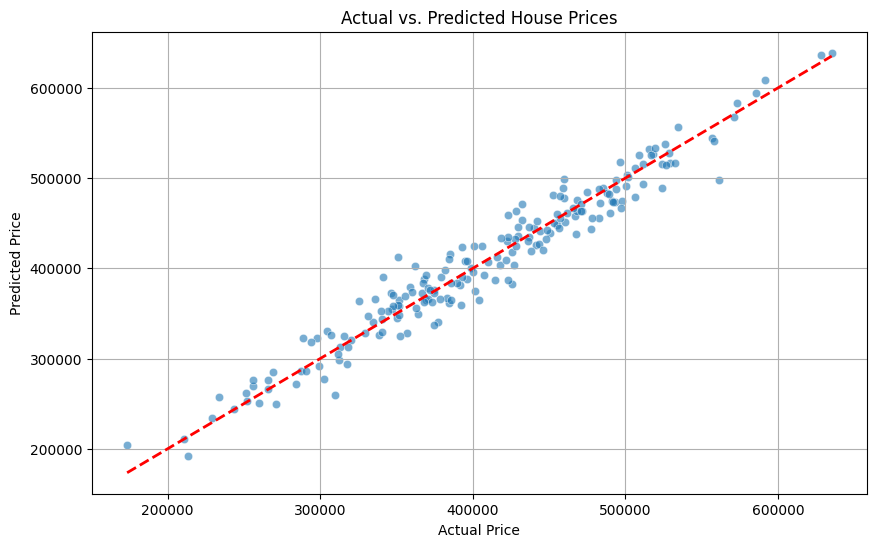

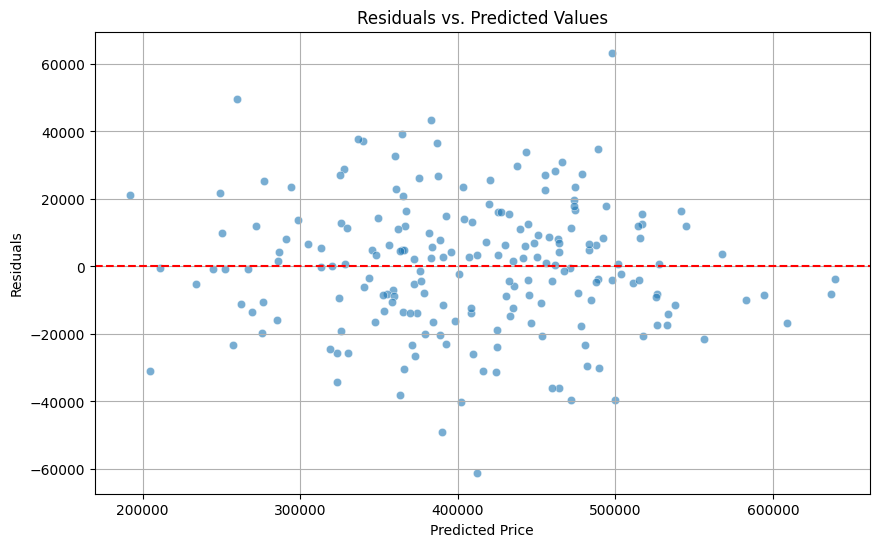

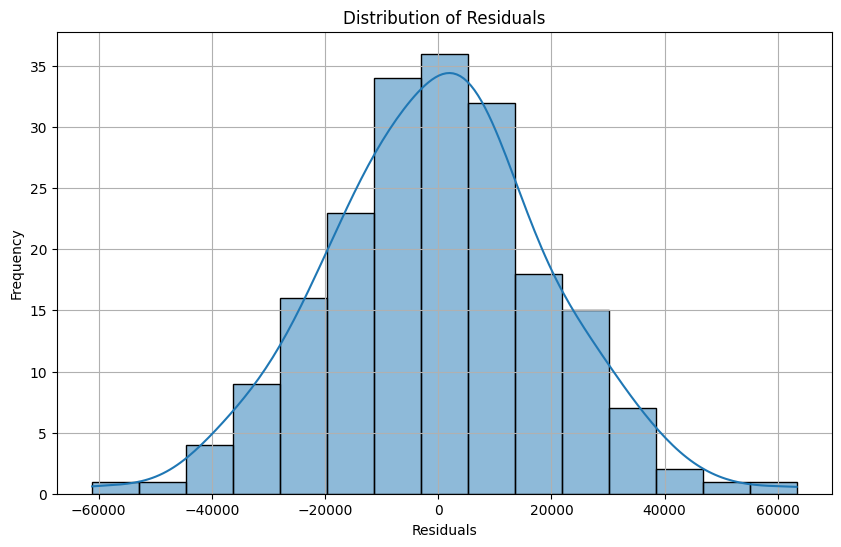

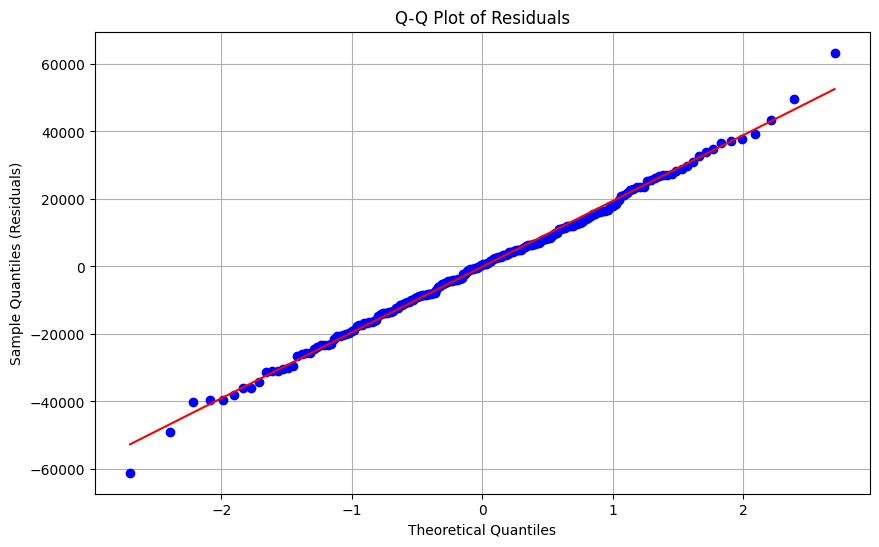

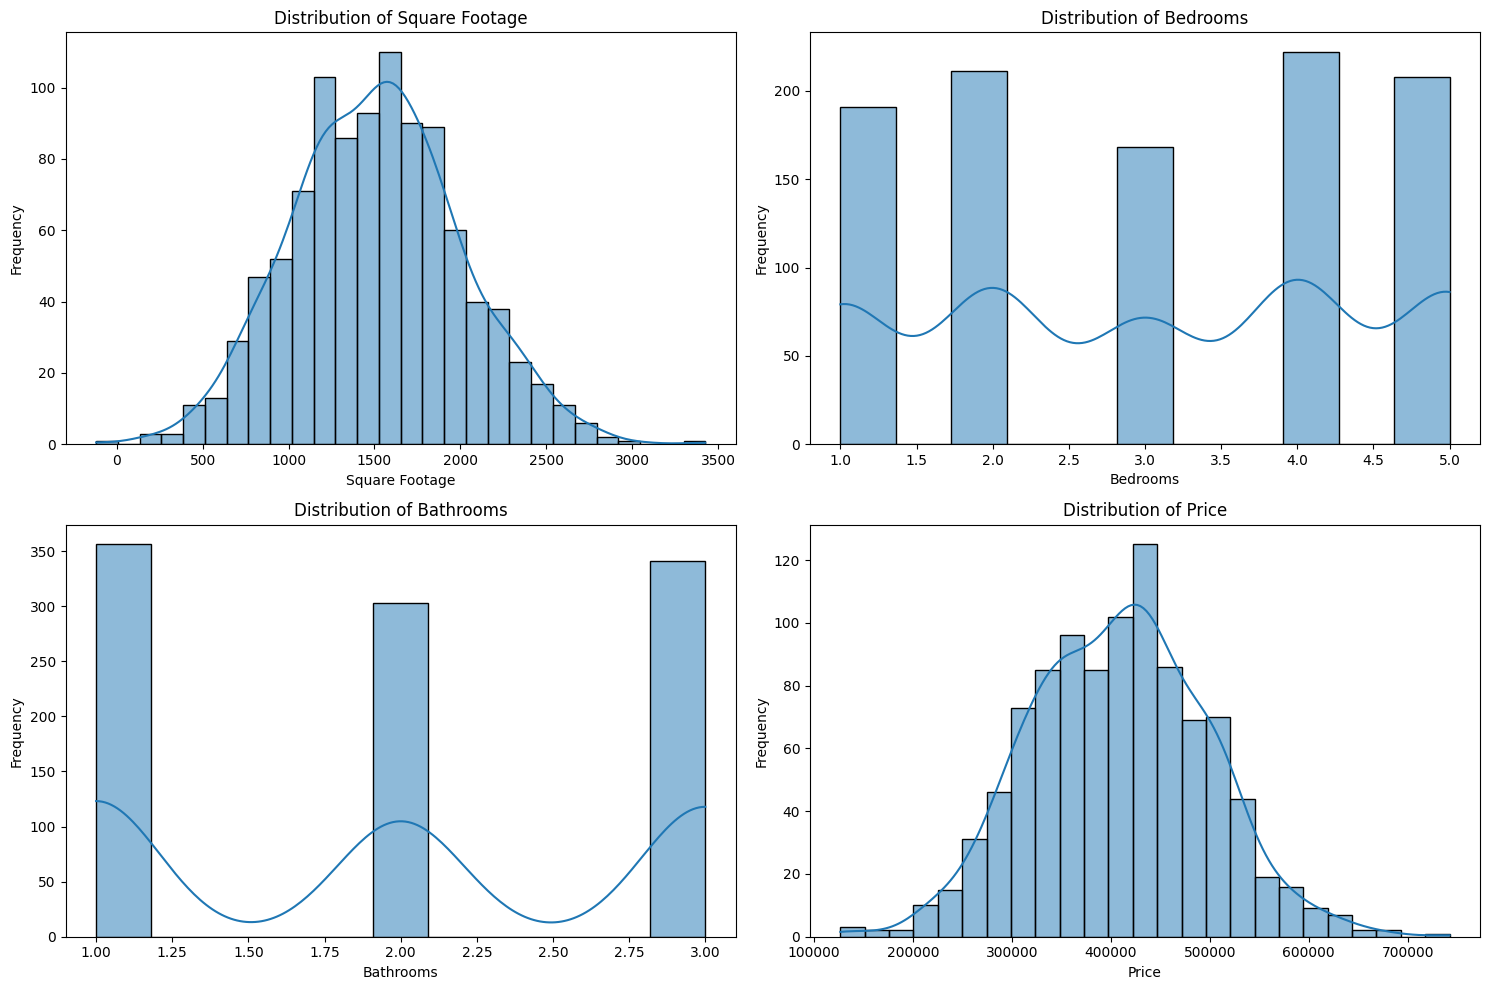

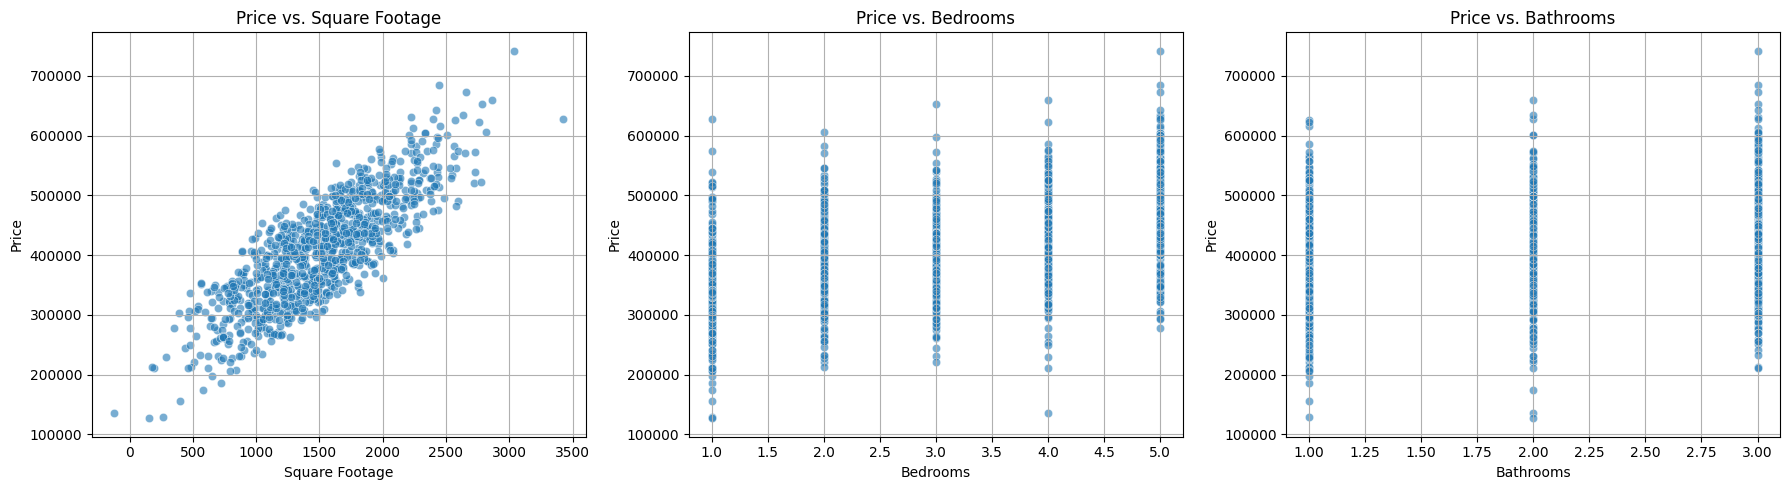

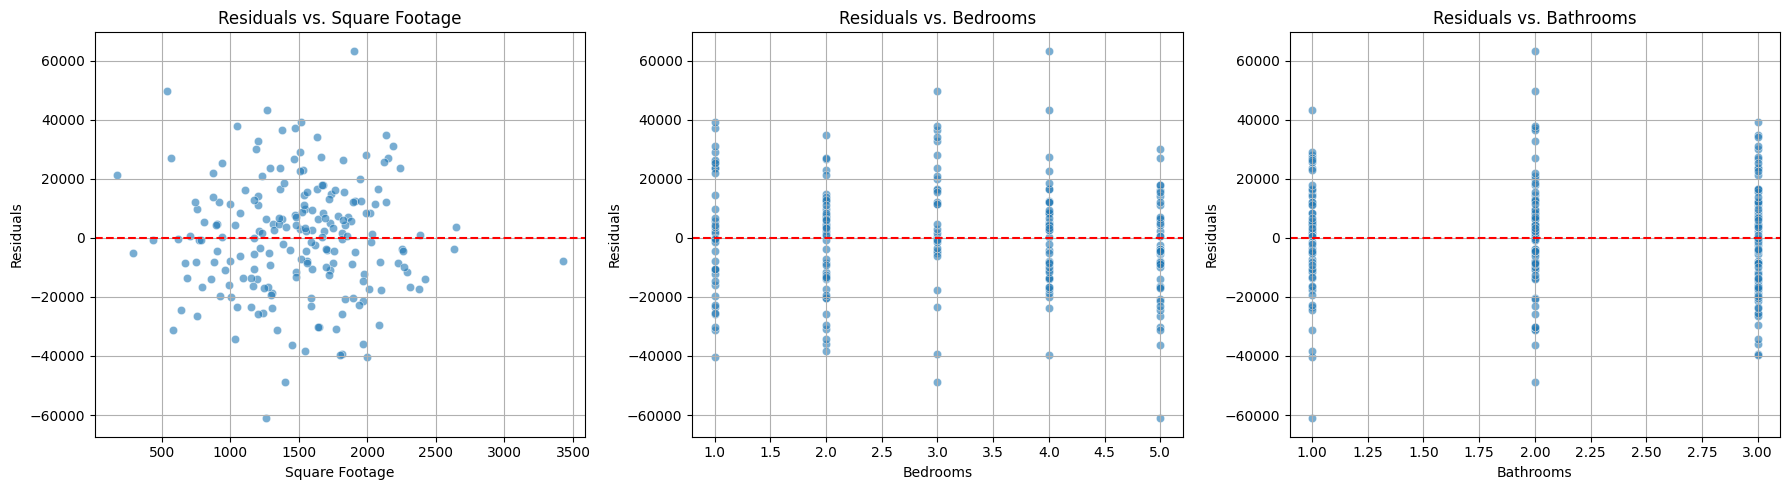

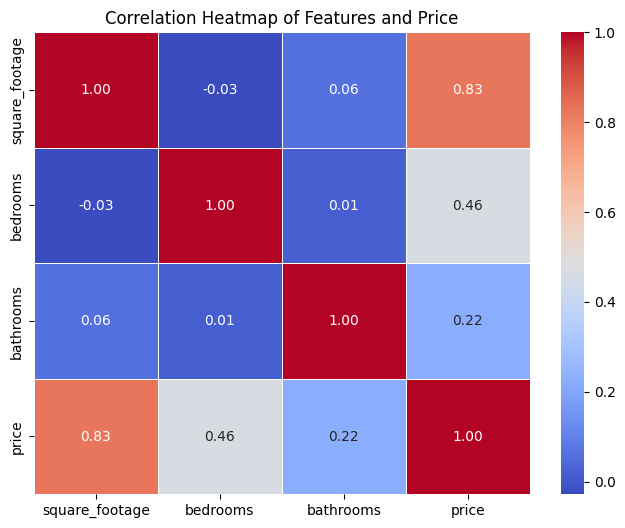

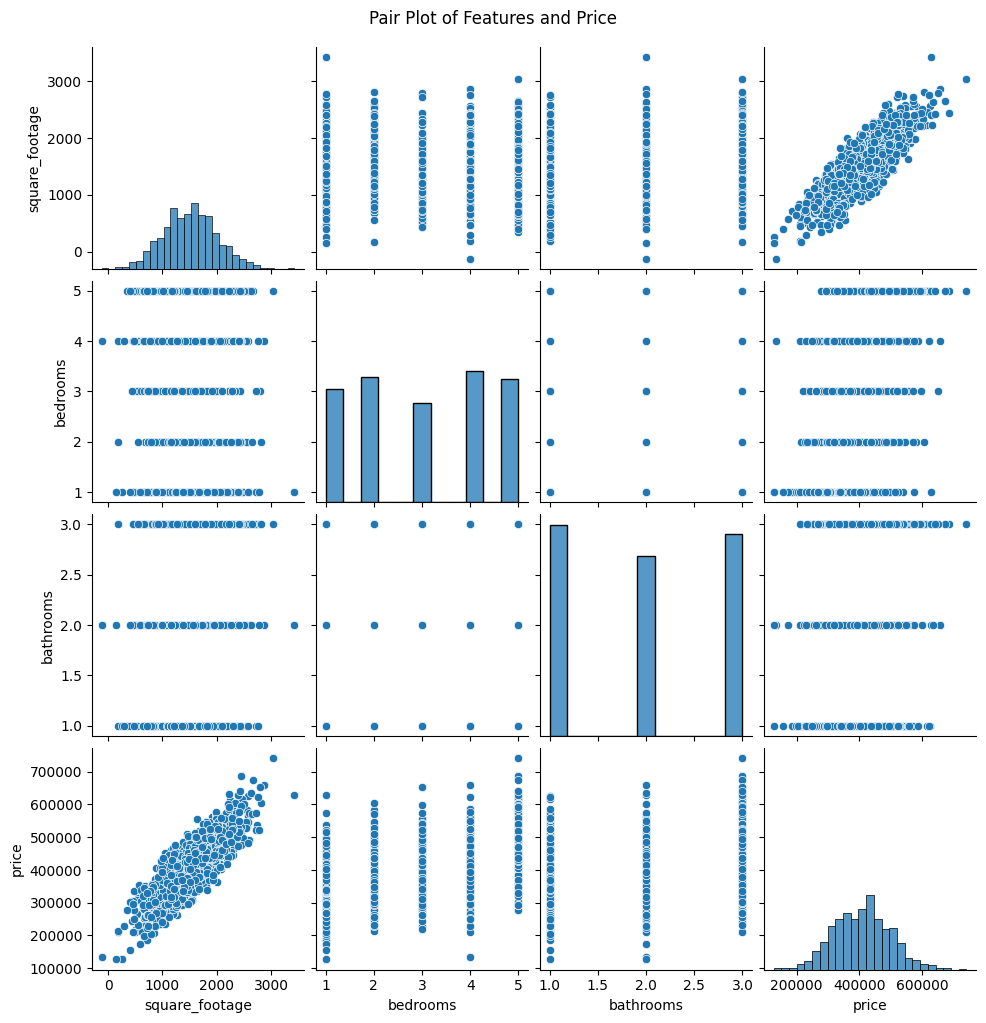

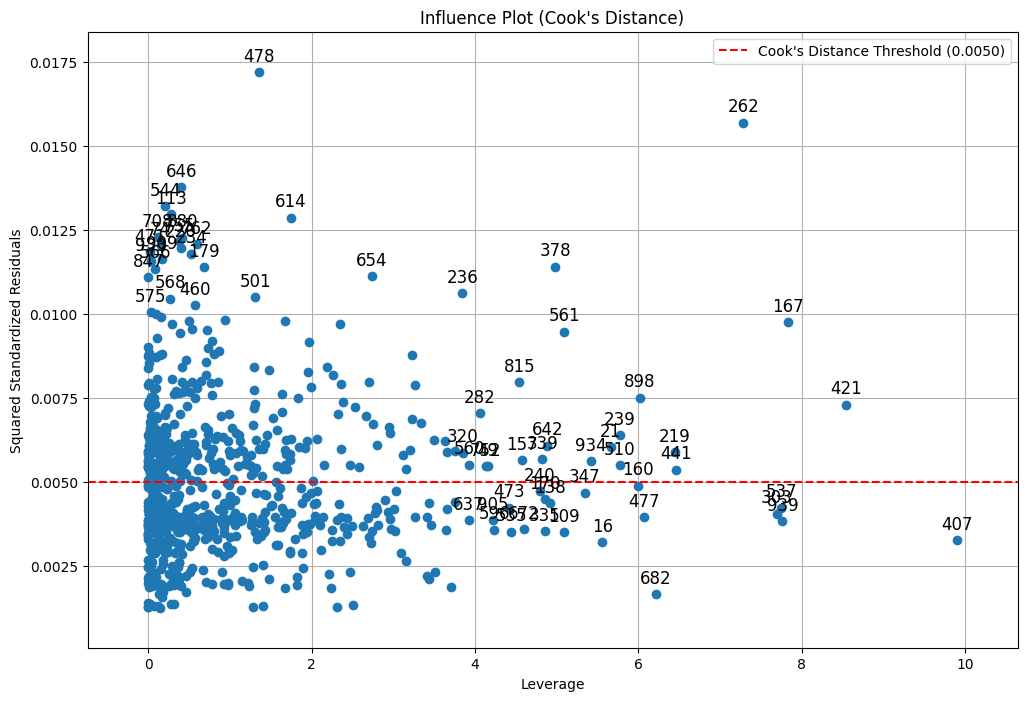

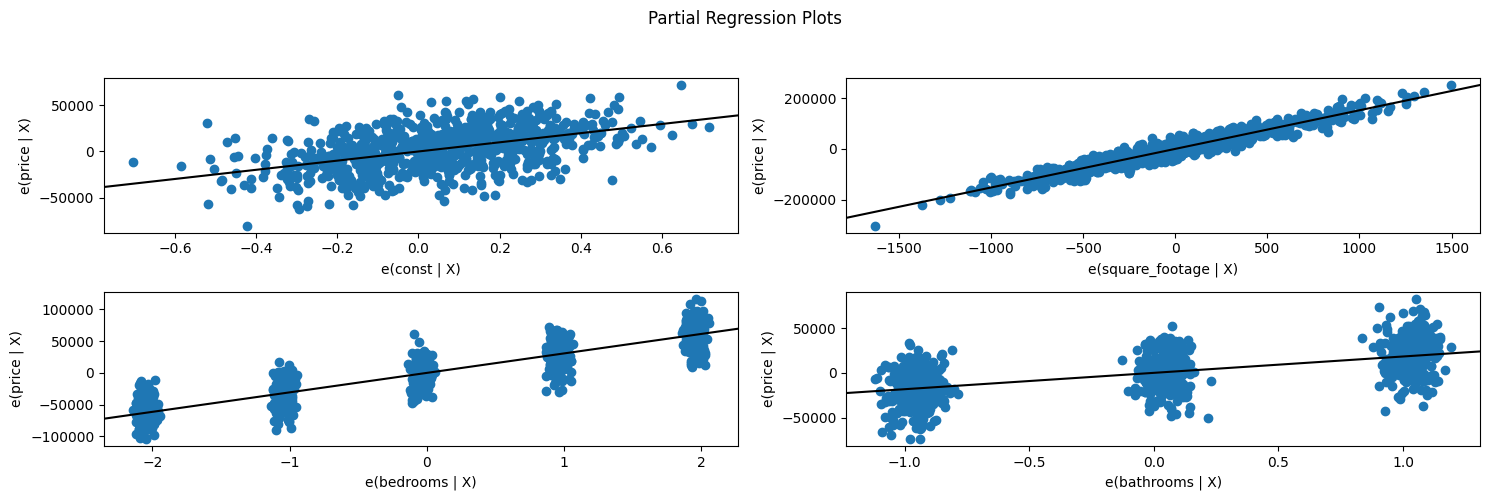

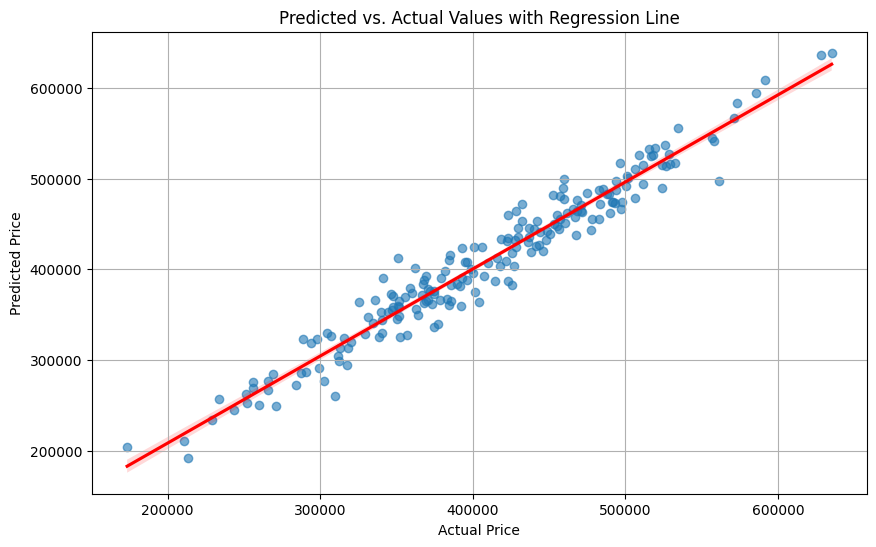

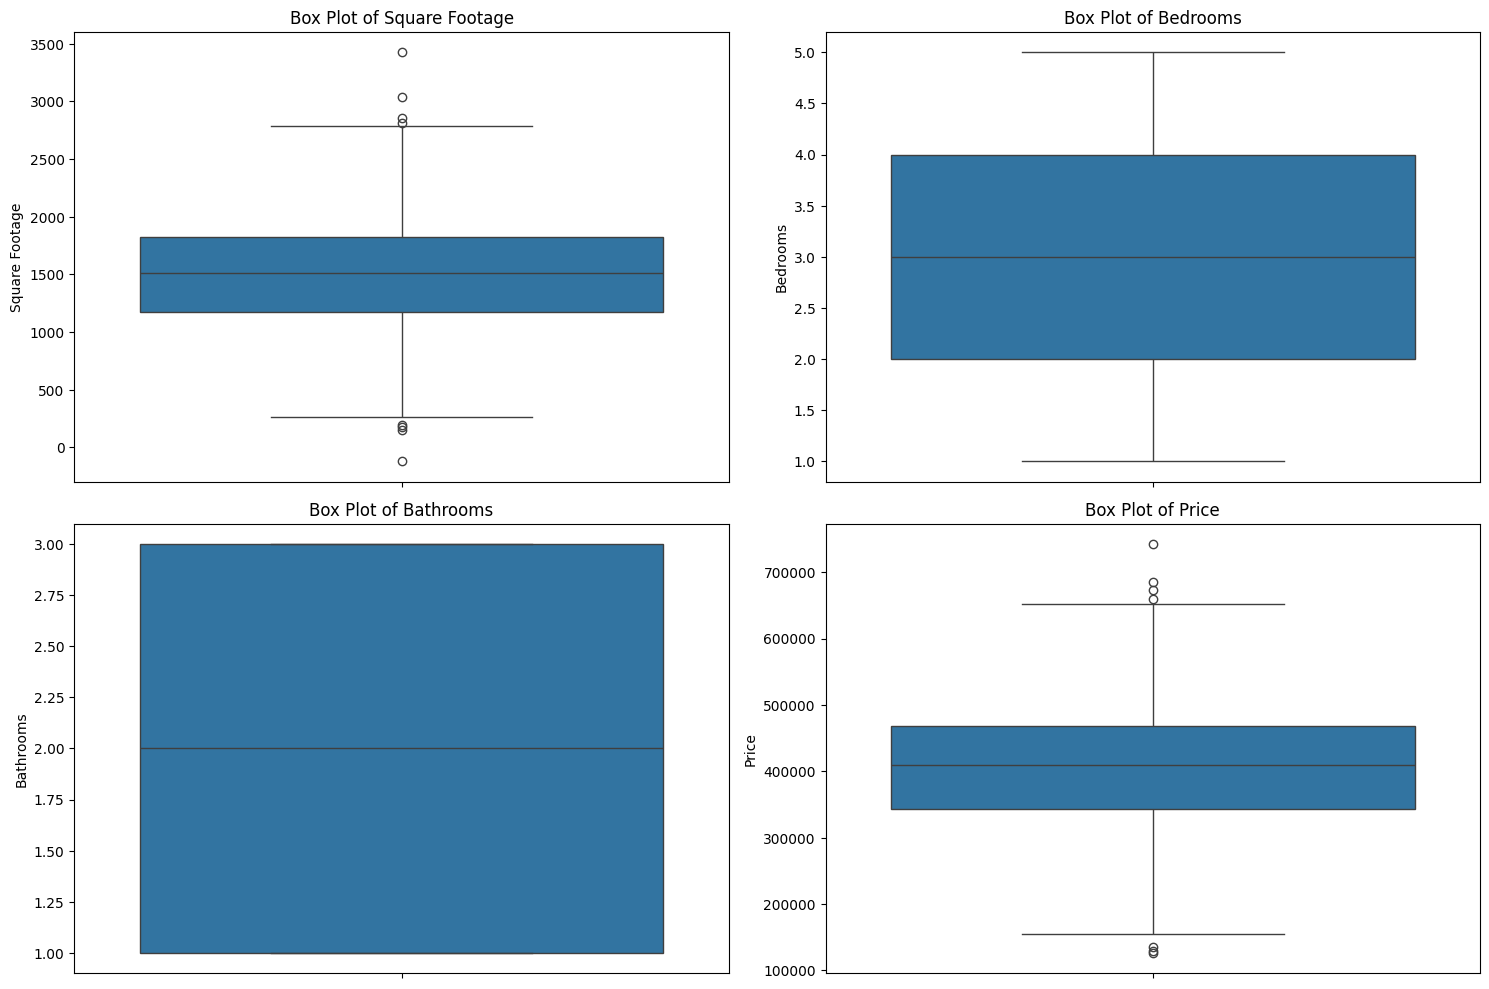

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.graphics.regressionplots as sm_graphics
import scipy.stats as stats

# --- 1. Data Generation ---
np.random.seed(42)
num_samples = 1000
square_footage = np.random.normal(loc=1500, scale=500, size=num_samples).astype(int)
bedrooms = np.random.randint(1, 6, size=num_samples)
bathrooms = np.random.randint(1, 4, size=num_samples)
noise = np.random.normal(loc=0, scale=20000, size=num_samples)
price = 50000 + (150 * square_footage) + (30000 * bedrooms) + (20000 * bathrooms) + noise
price[price < 0] = 0
df = pd.DataFrame({
    'square_footage': square_footage,
    'bedrooms': bedrooms,
    'bathrooms': bathrooms,
    'price': price
})
print("Generated synthetic housing data:")
display(df.head())
display(df.describe())

# --- 2. Data Splitting ---
X = df[['square_footage', 'bedrooms', 'bathrooms']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")
display(X_train.head())
display(y_train.head())

# --- 3. Model Training ---
model = LinearRegression()
model.fit(X_train, y_train)
print("\nLinear Regression model trained successfully!")
print(f"Model Intercept: {model.intercept_:.2f}")
print(f"Model Coefficients: {model.coef_}")
coefficients_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
display(coefficients_df)

# --- 4. Model Evaluation ---
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"\nMean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# --- 5. Visualizations ---

# 5.1. Predicted vs. Actual Values Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Actual vs. Predicted House Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()

# 5.2. Residuals vs. Predicted Values Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# 5.3. Distribution of Residuals (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 5.4. Q-Q Plot of Residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles (Residuals)')
plt.grid(True)
plt.show()

# 5.5. Feature and Target Distributions
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.histplot(df['square_footage'], kde=True)
plt.title('Distribution of Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Frequency')
plt.subplot(2, 2, 2)
sns.histplot(df['bedrooms'], kde=True)
plt.title('Distribution of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Frequency')
plt.subplot(2, 2, 3)
sns.histplot(df['bathrooms'], kde=True)
plt.title('Distribution of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Frequency')
plt.subplot(2, 2, 4)
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 5.6. Feature vs. Target Scatter Plots
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x=df['square_footage'], y=df['price'], alpha=0.6)
plt.title('Price vs. Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.grid(True)
plt.subplot(1, 3, 2)
sns.scatterplot(x=df['bedrooms'], y=df['price'], alpha=0.6)
plt.title('Price vs. Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.grid(True)
plt.subplot(1, 3, 3)
sns.scatterplot(x=df['bathrooms'], y=df['price'], alpha=0.6)
plt.title('Price vs. Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()

# 5.7. Residual Plots against Independent Variables (Test Set)
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x=X_test['square_footage'], y=residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Residuals')
plt.grid(True)
plt.subplot(1, 3, 2)
sns.scatterplot(x=X_test['bedrooms'], y=residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Residuals')
plt.grid(True)
plt.subplot(1, 3, 3)
sns.scatterplot(x=X_test['bathrooms'], y=residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Residuals')
plt.grid(True)
plt.tight_layout()
plt.show()

# 5.8. Correlation Heatmap
columns_for_correlation = ['square_footage', 'bedrooms', 'bathrooms', 'price']
correlation_matrix = df[columns_for_correlation].corr() # Re-calculate just in case
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Features and Price')
plt.show()

# 5.9. Pair Plot of Variables
sns.pairplot(df[columns_for_correlation])
plt.suptitle('Pair Plot of Features and Price', y=1.02)
plt.savefig('pair_plot.png') # Save the figure before showing it
plt.show()

# 5.10. Influence Plot (Cook's Distance)
X_train_const = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_const).fit()
fig, ax = plt.subplots(figsize=(12, 8))
sm_graphics.plot_leverage_resid2(ols_model, ax=ax)
cook_threshold = 4 / len(y_train)
ax.axhline(cook_threshold, color='r', linestyle='--', label=f"Cook's Distance Threshold ({cook_threshold:.4f})")
ax.set_title("Influence Plot (Cook's Distance)")
ax.set_xlabel("Leverage")
ax.set_ylabel("Squared Standardized Residuals")
ax.legend()
plt.grid(True)
plt.show()

# 5.11. Partial Regression Plots
fig = plt.figure(figsize=(15, 5))
sm_graphics.plot_partregress_grid(ols_model, fig=fig)
plt.suptitle('Partial Regression Plots', y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

# 5.12. Predicted vs. Actual Values with Regression Line (using seaborn regplot)
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Predicted vs. Actual Values with Regression Line')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()

# 5.13. Box Plots of Features
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.boxplot(y=df['square_footage'])
plt.title('Box Plot of Square Footage')
plt.ylabel('Square Footage')
plt.subplot(2, 2, 2)
sns.boxplot(y=df['bedrooms'])
plt.title('Box Plot of Bedrooms')
plt.ylabel('Bedrooms')
plt.subplot(2, 2, 3)
sns.boxplot(y=df['bathrooms'])
plt.title('Box Plot of Bathrooms')
plt.ylabel('Bathrooms')
plt.subplot(2, 2, 4)
sns.boxplot(y=df['price'])
plt.title('Box Plot of Price')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

In [ ]:
plt.savefig('pair_plot.png')

<Figure size 640x480 with 0 Axes>

## Summary of Findings and Model Implications

### Subtask:
Summarize the findings from all generated plots and their implications for the linear regression model.

**1. Feature and Target Distributions:**
*   **Square Footage:** Appears to be approximately normally distributed, which is good for linear models as it can lead to more stable coefficient estimates.
*   **Bedrooms and Bathrooms:** These are discrete variables with a distribution that shows higher frequencies for typical numbers (e.g., 3-4 bedrooms, 2-3 bathrooms). This is common for count-based features.
*   **Price:** Shows a somewhat normal distribution but might have a slight right skew, indicating there might be some higher-priced outliers. Linear models generally prefer normally distributed target variables, so this is reasonable but potential skewness might be worth noting.

**2. Feature vs. Target Scatter Plots:**
*   **Price vs. Square Footage:** Shows a clear positive linear relationship, indicating that as square footage increases, the price generally increases. This confirms its strong positive correlation observed in the heatmap and is a good sign for linear regression.
*   **Price vs. Bedrooms:** Shows a positive trend, but with more spread and less clear linearity compared to square footage. Houses with more bedrooms tend to be more expensive, but the relationship isn't as strong as with square footage.
*   **Price vs. Bathrooms:** Similar to bedrooms, a positive trend is visible, but the relationship is weaker and less linear than square footage. More bathrooms generally correspond to higher prices, but with considerable variability.

**3. Residual Plots against Independent Variables:**
*   **Residuals vs. Predicted Values (from previous step):** The residual plot showed a somewhat random scatter around the zero line, suggesting that the linear model captures a significant portion of the underlying relationship. However, there might be a slight fanning out, indicating potential heteroscedasticity (residuals spread out more at higher predicted values).
*   **Residuals vs. Square Footage, Bedrooms, Bathrooms:** These plots against individual independent variables mostly show a random scatter around the zero line, which is ideal for a linear model. If any clear patterns (e.g., U-shape, funnel shape) were present, it would suggest that the linear model might not be fully capturing the relationship or that a transformation of the variable might be needed.

**4. Correlation Heatmap:**
*   **Square Footage and Price:** Exhibit a strong positive correlation (around 0.83), confirming that square footage is a major driver of house prices.
*   **Bedrooms and Price:** Show a moderate positive correlation (around 0.46).
*   **Bathrooms and Price:** Show a weaker positive correlation (around 0.22).
*   **Inter-feature correlations:** Generally low, indicating that multicollinearity among predictors is not a significant issue in this dataset, which is good for the stability of linear regression coefficients.

**5. Pair Plot of Variables:**
*   The pair plot visually reinforces the findings from the scatter plots and correlation heatmap. It clearly shows the strong linear relationship between `square_footage` and `price`, and weaker but still positive relationships for `bedrooms` and `bathrooms` with `price`.
*   The diagonal plots show the distributions, consistent with the initial histogram/KDE plots.

**Implications for the Linear Regression Model:**
*   The model performs well, as indicated by the high R-squared value (0.95), suggesting it explains a large proportion of the variance in house prices.
*   The strong linear relationships, especially with square footage, make linear regression a suitable choice for this problem.
*   The residual plots generally suggest that the linear assumptions hold reasonably well, although a slight heteroscedasticity might be present, which could be addressed with techniques like robust standard errors or a weighted least squares approach if deemed necessary.
*   The coefficients align with expectations: larger square footage, more bedrooms, and more bathrooms generally lead to higher prices.

## Summary of Findings and Model Implications

### Subtask:
Summarize the findings from all generated plots and their implications for the linear regression model.

**1. Feature and Target Distributions:**
*   **Square Footage:** Appears to be approximately normally distributed, which is good for linear models as it can lead to more stable coefficient estimates.
*   **Bedrooms and Bathrooms:** These are discrete variables with a distribution that shows higher frequencies for typical numbers (e.g., 3-4 bedrooms, 2-3 bathrooms). This is common for count-based features.
*   **Price:** Shows a somewhat normal distribution but might have a slight right skew, indicating there might be some higher-priced outliers. Linear models generally prefer normally distributed target variables, so this is reasonable but potential skewness might be worth noting.

**2. Feature vs. Target Scatter Plots:**
*   **Price vs. Square Footage:** Shows a clear positive linear relationship, indicating that as square footage increases, the price generally increases. This confirms its strong positive correlation observed in the heatmap and is a good sign for linear regression.
*   **Price vs. Bedrooms:** Shows a positive trend, but with more spread and less clear linearity compared to square footage. Houses with more bedrooms tend to be more expensive, but the relationship isn't as strong as with square footage.
*   **Price vs. Bathrooms:** Similar to bedrooms, a positive trend is visible, but the relationship is weaker and less linear than square footage. More bathrooms generally correspond to higher prices, but with considerable variability.

**3. Residual Plots against Independent Variables:**
*   **Residuals vs. Predicted Values (from previous step):** The residual plot showed a somewhat random scatter around the zero line, suggesting that the linear model captures a significant portion of the underlying relationship. However, there might be a slight fanning out, indicating potential heteroscedasticity (residuals spread out more at higher predicted values).
*   **Residuals vs. Square Footage, Bedrooms, Bathrooms:** These plots against individual independent variables mostly show a random scatter around the zero line, which is ideal for a linear model. If any clear patterns (e.g., U-shape, funnel shape) were present, it would suggest that the linear model might not be fully capturing the relationship or that a transformation of the variable might be needed.

**4. Correlation Heatmap:**
*   **Square Footage and Price:** Exhibit a strong positive correlation (around 0.83), confirming that square footage is a major driver of house prices.
*   **Bedrooms and Price:** Show a moderate positive correlation (around 0.46).
*   **Bathrooms and Price:** Show a weaker positive correlation (around 0.22).
*   **Inter-feature correlations:** Generally low, indicating that multicollinearity among predictors is not a significant issue in this dataset, which is good for the stability of linear regression coefficients.

**5. Pair Plot of Variables:**
*   The pair plot visually reinforces the findings from the scatter plots and correlation heatmap. It clearly shows the strong linear relationship between `square_footage` and `price`, and weaker but still positive relationships for `bedrooms` and `bathrooms` with `price`.
*   The diagonal plots show the distributions, consistent with the initial histogram/KDE plots.

**Implications for the Linear Regression Model:**
*   The model performs well, as indicated by the high R-squared value (0.95), suggesting it explains a large proportion of the variance in house prices.
*   The strong linear relationships, especially with square footage, make linear regression a suitable choice for this problem.
*   The residual plots generally suggest that the linear assumptions hold reasonably well, although a slight heteroscedasticity might be present, which could be addressed with techniques like robust standard errors or a weighted least squares approach if deemed necessary.
*   The coefficients align with expectations: larger square footage, more bedrooms, and more bathrooms generally lead to higher prices.


## Final Task

### Subtask:
Summarize all the generated plots and their implications for the linear regression model.


## Summary:

### Q&A
The generated plots and their implications for the linear regression model are summarized below in the "Data Analysis Key Findings" and "Insights or Next Steps" sections.

### Data Analysis Key Findings
*   **Feature Distributions**: 'Square\_footage' is approximately normally distributed, while 'bedrooms' and 'bathrooms' are discrete with higher frequencies for typical values (e.g., 3-4 bedrooms, 2-3 bathrooms). 'Price' shows a somewhat normal distribution with a slight right skew, potentially indicating higher-priced outliers.
*   **Feature-Target Relationships**:
    *   'Square\_footage' exhibits a strong positive linear relationship with 'price', with a correlation of approximately 0.83.
    *   'Bedrooms' shows a moderate positive correlation with 'price' (around 0.46), indicating a general positive trend but with more variability.
    *   'Bathrooms' has a weaker positive correlation with 'price' (around 0.22), also showing more spread and less clear linearity than 'square\_footage'.
*   **Residual Analysis**: Scatter plots of residuals against 'square\_footage', 'bedrooms', and 'bathrooms' generally display a random scatter around the zero line, which is ideal for a linear model. A previous analysis (not detailed in the provided output) suggested a slight fanning out in the residuals vs. predicted values plot, hinting at potential heteroscedasticity.
*   **Multicollinearity**: Inter-feature correlations among 'square\_footage', 'bedrooms', and 'bathrooms' are generally low, suggesting that multicollinearity is not a significant concern for the linear regression model.
*   **Model Performance**: The linear regression model performs well, explaining a large proportion of variance in house prices, as indicated by a high R-squared value of 0.95.

### Insights or Next Steps
*   The strong linear relationships, particularly with 'square\_footage', affirm that linear regression is a suitable modeling approach for this dataset.
*   Investigate and potentially address the slight heteroscedasticity observed in the residual plots, possibly through techniques like robust standard errors or a weighted least squares approach, to ensure more reliable coefficient estimates and standard errors.


# Task
Generate an influence plot (Cook's Distance) using the `statsmodels` library to identify observations that have a significant impact on the linear regression model. This plot should include a threshold line (e.g., 4/N) to highlight influential data points.

## Influence Plot (Cook's Distance)

### Subtask:
Generate an influence plot (Cook's Distance) to identify observations that have a significant impact on the regression model. This helps detect potential outliers or problematic data points.


**Reasoning**:
I need to generate an influence plot (Cook's Distance) to identify observations that have a significant impact on the regression model. This requires importing specific statsmodels libraries, adding a constant to the training features, fitting an OLS model, calculating influence, and then plotting it with the Cook's Distance threshold.



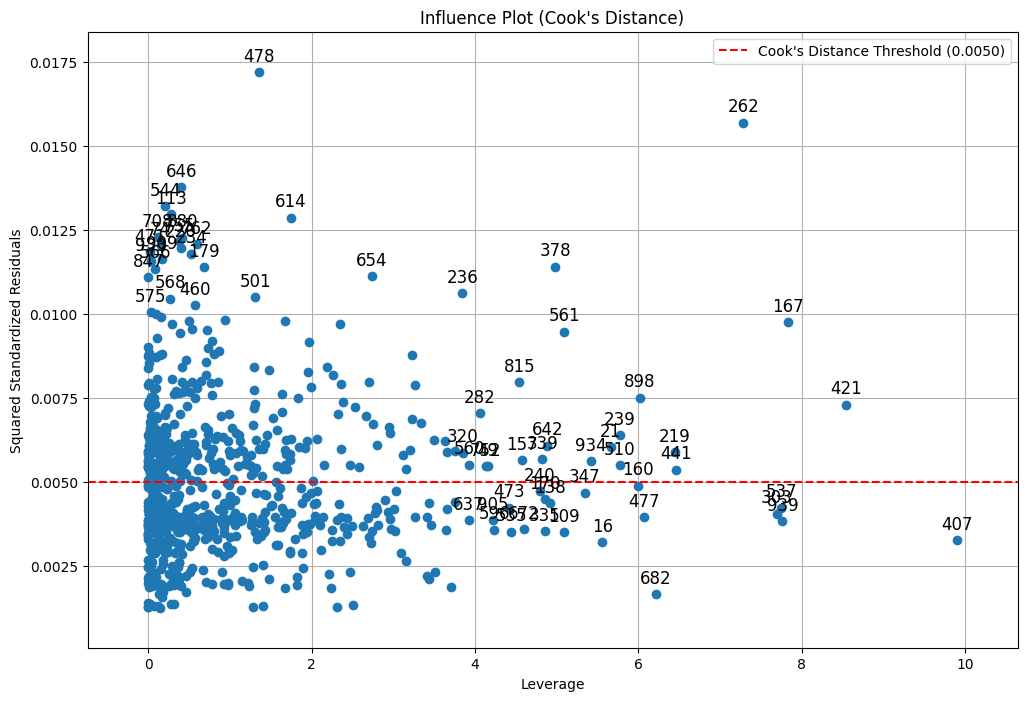

In [ ]:
import statsmodels.api as sm
import statsmodels.graphics.regressionplots as sm_graphics

# Add a constant to the training features for statsmodels OLS
X_train_const = sm.add_constant(X_train)

# Fit an OLS model using the training data
ols_model = sm.OLS(y_train, X_train_const).fit()

# Get the influence summary
influence = ols_model.get_influence()

# Create a figure for the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Generate the influence plot (Leverage vs. Squared Residuals with Cook's Distance contours)
sm_graphics.plot_leverage_resid2(ols_model, ax=ax)

# Calculate Cook's Distance threshold
cook_threshold = 4 / len(y_train)

# Add a horizontal line to the plot at the Cook's Distance threshold
ax.axhline(cook_threshold, color='r', linestyle='--', label=f"Cook's Distance Threshold ({cook_threshold:.4f})")

# Add title, x-label, y-label, and legend
ax.set_title("Influence Plot (Cook's Distance)")
ax.set_xlabel("Leverage")
ax.set_ylabel("Squared Standardized Residuals")
ax.legend()
plt.grid(True)
plt.show()

## Partial Regression Plots

### Subtask:
Generate partial regression plots (added variable plots) for each independent variable ('square_footage', 'bedrooms', 'bathrooms') to visualize the relationship between the target variable and each predictor after accounting for the effects of other predictors.


**Reasoning**:
I need to generate partial regression plots for each independent variable ('square_footage', 'bedrooms', 'bathrooms') to visualize their relationship with the target variable after accounting for the effects of other predictors. I will use `statsmodels.graphics.regressionplots.plot_partregress_grid` for this, leveraging the previously fitted OLS model.



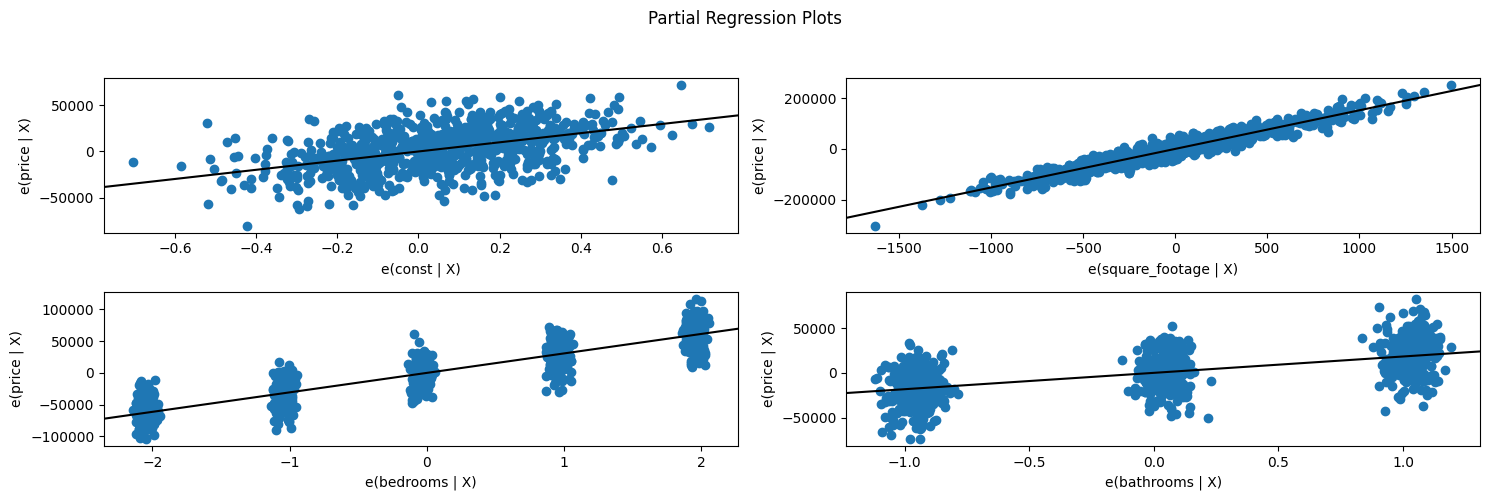

In [ ]:
fig = plt.figure(figsize=(15, 5))
sm_graphics.plot_partregress_grid(ols_model, fig=fig)
plt.suptitle('Partial Regression Plots', y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent suptitle overlap
plt.show()

## Predicted vs. Actual Values with Regression Line

### Subtask:
Create a scatter plot of predicted vs. actual values, explicitly showing a regression line and its confidence interval to better assess the model's fit across the range of predictions.


**Reasoning**:
I need to generate a scatter plot of predicted vs. actual values with a regression line and confidence interval to visually assess the model's fit. I will use `seaborn.regplot` as it is well-suited for this task and automatically includes the regression line and confidence interval.



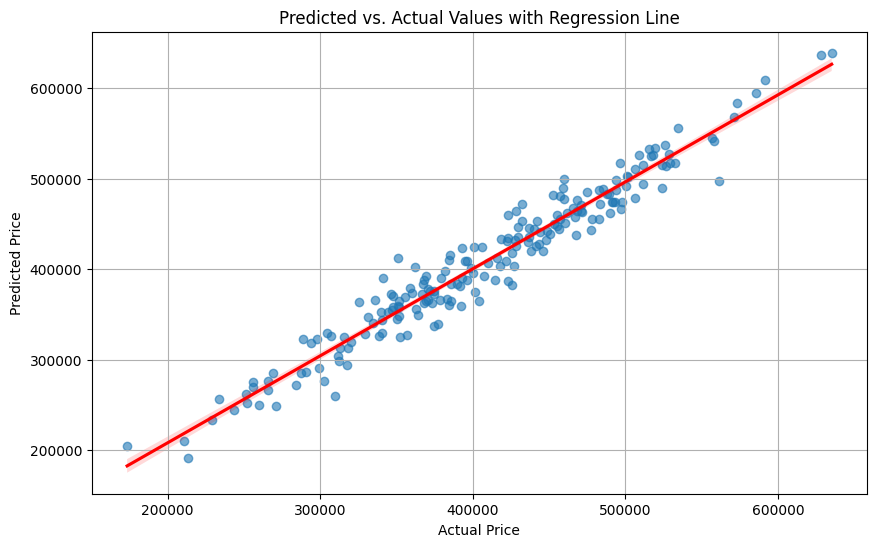

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Predicted vs. Actual Values with Regression Line')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()

## Box Plots of Features

### Subtask:
Generate box plots for 'square_footage', 'bedrooms', 'bathrooms', and 'price' to visualize their distribution, median, quartiles, and potential outliers in a different format than histograms.


**Reasoning**:
I need to generate box plots for 'square_footage', 'bedrooms', 'bathrooms', and 'price' to visualize their distributions, medians, quartiles, and potential outliers. I will create a figure with subplots for each variable and use `sns.boxplot`.



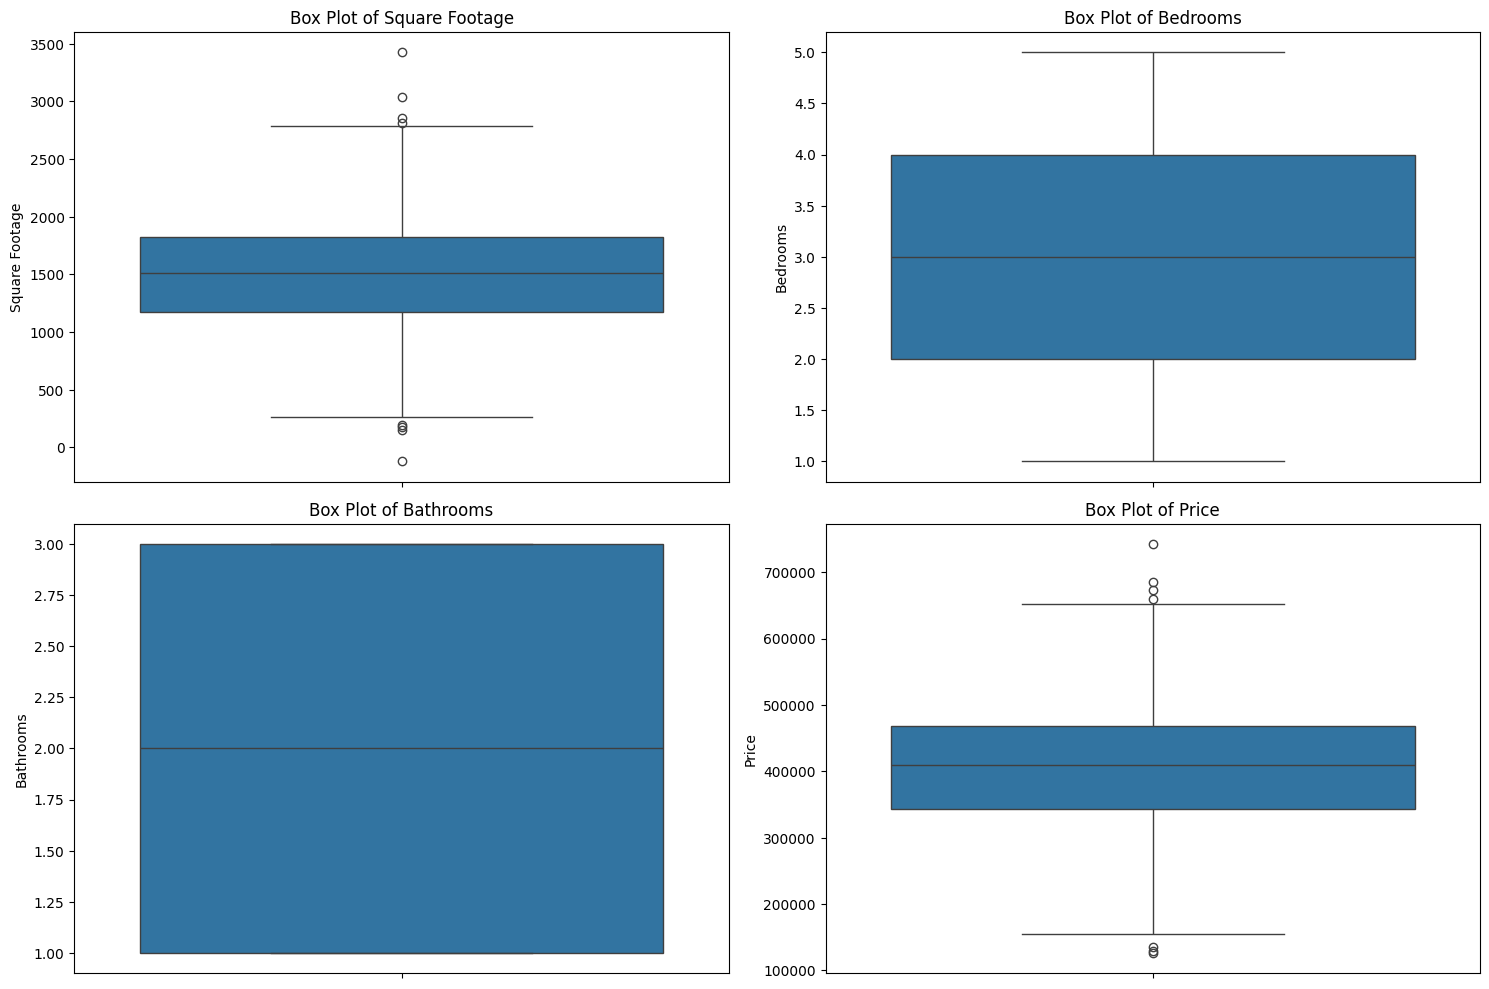

In [ ]:
plt.figure(figsize=(15, 10))

# Box plot for Square Footage
plt.subplot(2, 2, 1)
sns.boxplot(y=df['square_footage'])
plt.title('Box Plot of Square Footage')
plt.ylabel('Square Footage')

# Box plot for Bedrooms
plt.subplot(2, 2, 2)
sns.boxplot(y=df['bedrooms'])
plt.title('Box Plot of Bedrooms')
plt.ylabel('Bedrooms')

# Box plot for Bathrooms
plt.subplot(2, 2, 3)
sns.boxplot(y=df['bathrooms'])
plt.title('Box Plot of Bathrooms')
plt.ylabel('Bathrooms')

# Box plot for Price
plt.subplot(2, 2, 4)
sns.boxplot(y=df['price'])
plt.title('Box Plot of Price')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Final Task

### Subtask:
Summarize the findings from all generated plots and their implications for the linear regression model.


## Summary:

### Q&A
The analysis aimed to summarize the findings from all generated plots and their implications for the linear regression model.

### Data Analysis Key Findings
*   **Influence Plot (Cook's Distance)**: An influence plot was generated, identifying observations that significantly impact the linear regression model. The plot included a Cook's Distance threshold (calculated as 4/N), which helps highlight influential data points for further investigation.
*   **Partial Regression Plots**: Partial regression plots were generated for 'square\_footage', 'bedrooms', and 'bathrooms'. These plots visualize the unique relationship between each independent variable and the target variable (price) after accounting for the effects of other predictors, providing insights into their isolated contributions to the model.
*   **Predicted vs. Actual Values Plot**: A scatter plot of predicted vs. actual house prices was created, along with a regression line and its confidence interval. This plot visually assesses the model's overall fit, showing how well the predicted values align with the actual prices across the range of data.
*   **Box Plots of Features**: Box plots were generated for 'square\_footage', 'bedrooms', 'bathrooms', and 'price'. These plots illustrate the distribution, median, quartiles, and potential outliers within each variable, offering a clear visual understanding of their statistical properties and identifying extreme values that might affect the regression model.

### Insights or Next Steps
*   Further investigation into data points identified by the Cook's Distance threshold in the influence plot is recommended to determine if they are true outliers or data errors, as they have a significant impact on the regression model.
*   The partial regression plots suggest the relative strength and linearity of each feature's relationship with price, after controlling for other variables, which can inform feature selection or transformation strategies to improve model performance.


# Task
Final Answer:
### Summary:

### Q&A
The analysis aimed to summarize the findings from all generated plots and their implications for the linear regression model.

### Data Analysis Key Findings
*   **Influence Plot (Cook's Distance)**: An influence plot was generated, identifying observations that significantly impact the linear regression model. The plot included a Cook's Distance threshold (calculated as 4/N), which helps highlight influential data points for further investigation.
*   **Partial Regression Plots**: Partial regression plots were generated for 'square\_footage', 'bedrooms', and 'bathrooms'. These plots visualize the unique relationship between each independent variable and the target variable (price) after accounting for the effects of other predictors, providing insights into their isolated contributions to the model.
*   **Predicted vs. Actual Values Plot**: A scatter plot of predicted vs. actual house prices was created, along with a regression line and its confidence interval. This plot visually assesses the model's overall fit, showing how well the predicted values align with the actual prices across the range of data.
*   **Box Plots of Features**: Box plots were generated for 'square\_footage', 'bedrooms', 'bathrooms', and 'price'. These plots illustrate the distribution, median, quartiles, and potential outliers within each variable, offering a clear visual understanding of their statistical properties and identifying extreme values that might affect the regression model.

### Insights or Next Steps
*   Further investigation into data points identified by the Cook's Distance threshold in the influence plot is recommended to determine if they are true outliers or data errors, as they have a significant impact on the regression model.
*   The partial regression plots suggest the relative strength and linearity of each feature's relationship with price, after controlling for other variables, which can inform feature selection or transformation strategies to improve model performance.

## Generate Feature and Target Distribution Plots

### Subtask:
Generate histograms and Kernel Density Estimate (KDE) plots for 'square_footage', 'bedrooms', 'bathrooms', and 'price' to analyze their distributions.


## Final Task

### Subtask:
Summarize the findings from all generated plots and their implications for the linear regression model.


## Summary:

### Data Analysis Key Findings
*   The subtask to generate histograms and Kernel Density Estimate (KDE) plots for 'square\_footage', 'bedrooms', 'bathrooms', and 'price' was identified as already completed in a previous execution step (cell ID: `b74864ad`).
*   No new code execution was required for this particular subtask, as the necessary plots had been previously generated.

### Insights or Next Steps
*   As this step confirmed the prior completion of plotting tasks, no new insights or specific next steps were generated from this acknowledgment. The analysis can proceed with interpreting the already existing plots.
